In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download dataset
!wget https://raw.githubusercontent.com/ShawnASC5/Student-Performance-Factors/refs/heads/main/dataset.csv

--2025-02-10 03:19:20--  https://raw.githubusercontent.com/ShawnASC5/Student-Performance-Factors/refs/heads/main/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 470858 (460K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>] 459.82K  --.-KB/s    in 0.03s   

2025-02-10 03:19:20 (13.2 MB/s) - ‘dataset.csv’ saved [470858/470858]




**Overview:**

This dataset contains data from a higher education institution on various variables related to undergraduate students, including demographics, social-economic factors, and academic performance, to investigate the impact of these factors on student dropout and academic success.

- For some reason, the Dataset labled some columns as "Categorical", but when we looked at the Data by column, it had entirely all numbers, so we had to do seperate research to find out what each number meant (See Image Below for Example).




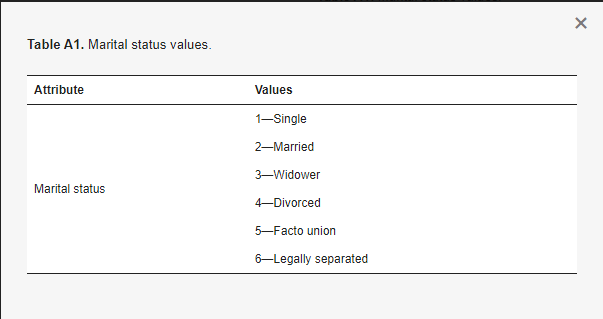

In [ ]:
#Upload dataset
df_factors = pd.read_csv("dataset.csv")

#get dataset information
df_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

# Clean data

In [ ]:
# step 1. check duplicate data
df_factors.duplicated().sum()

0

In [ ]:
# step 2. check null
# how should we deal with the null?
print("\nNull values per column:")
print(df_factors.isnull().sum())
# We can also see all available columns


Null values per column:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                          

In [ ]:
df_factors.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
#See how many values are in our Target column
df_factors["Target"].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


# Target Column:
After Preprocessing our data we verified the values in our Target column and we found that it has Three values that consist of "Graduate", "Dropout", and Enrolled", this is important information to identify which one of these values we will target. We then proceed to Hot Encode the Target column to split these values in separate columns



In [ ]:
# One-Hot Encoding

df_factors_encoded = pd.get_dummies(df_factors)
correlation_matrix = df_factors_encoded.corr()


#See new columns added as a result of Hot encoding
df_factors_encoded.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0.000000,0,10.8,1.4,1.74,True,False,False
1,1,6,1,11,1,1,1,1,3,4,...,6,6,13.666667,0,13.9,-0.3,0.79,False,False,True
2,1,1,5,5,1,1,1,22,27,10,...,0,0,0.000000,0,10.8,1.4,1.74,True,False,False
3,1,8,2,15,1,1,1,23,27,6,...,10,5,12.400000,0,9.4,-0.8,-3.12,False,False,True
4,2,12,1,3,0,1,1,22,28,10,...,6,6,13.000000,0,13.9,-0.3,0.79,False,False,True


In [ ]:
import pandas as pd

summary = pd.DataFrame({
    'Target': ['Graduate', 'Dropout'],
    'False': [df_factors_encoded['Target_Graduate'].value_counts()[0], df_factors_encoded['Target_Dropout'].value_counts()[0]],
    'True': [df_factors_encoded['Target_Graduate'].value_counts()[1], df_factors_encoded['Target_Dropout'].value_counts()[1]]
})
print(summary)

     Target  False  True
0  Graduate   2215  2209
1   Dropout   3003  1421


<ipython-input-9-eb0025f525ad>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'False': [df_factors_encoded['Target_Graduate'].value_counts()[0], df_factors_encoded['Target_Dropout'].value_counts()[0]],
<ipython-input-9-eb0025f525ad>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'True': [df_factors_encoded['Target_Graduate'].value_counts()[1], df_factors_encoded['Target_Dropout'].value_counts()[1]]


# **Visualization**

# Correlation Matrix: Dropouts Analysis

- "Age at Enrollment": This feature has the highest positive correlation with dropping out. This indicates that older students may face unique challenges that contribute to a higher likelihood of dropping out. Possible factors could include balancing studies with work or family responsibilities.

- "Debtor": A moderately positive correlation suggests that financial debt is a significant risk factor for dropout. This emphasizes the importance of financial aid programs or counseling to support students at risk.

- "Gender": A positive correlation of 0.2 indicates that gender might play a role in dropout rates. Understanding whether societal, cultural, or institutional factors contribute to this difference can help address disparities.

- "Scholarship Holder": A negative correlation with dropouts implies that scholarships may act as a protective factor against dropping out. This underscores the importance of providing financial incentives and support systems.

- "Curricular Units Approved": Strong negative correlations with dropouts suggest that academic performance, measured by the number of units approved, is a key determinant of persistence in studies. Students struggling academically might benefit from targeted interventions like tutoring or mentoring.

- "Tuition Fees Up to Date": A negative correlation suggests that students who are financially up-to-date with their tuition are less likely to drop out. This further highlights the importance of financial stability for academic success.

- "Target_Graduate": As expected, a strong negative correlation with Target_Dropout reflects the natural inverse relationship between graduation and dropout rates.

========================================================================
========================================================================
👁 👁

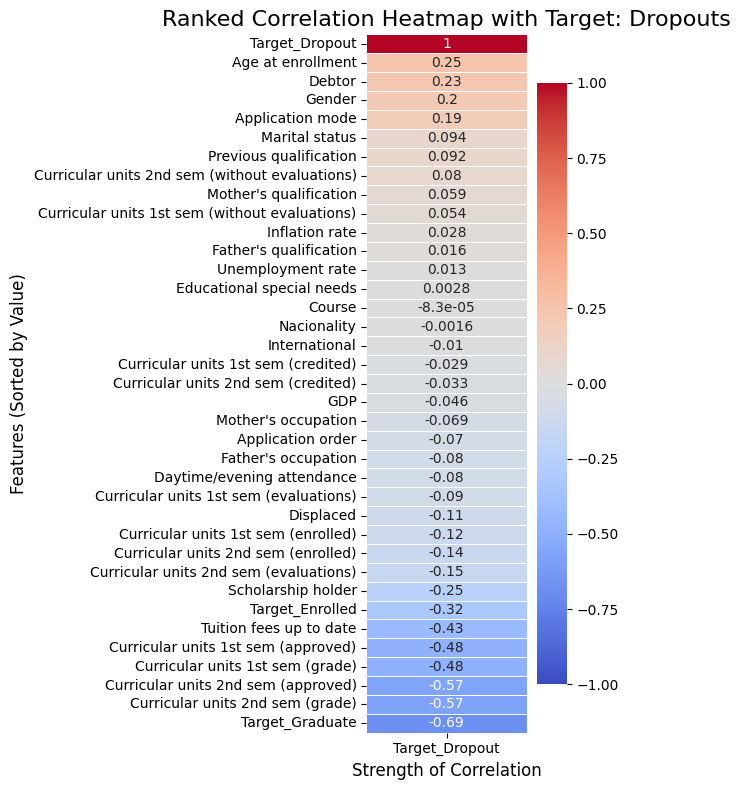

In [ ]:
# Sort the correlation coefficients with the target variable Target_Dropout in descending order,
# and visualize the strength of correlations using a heatmap.

sorted_corr = correlation_matrix[['Target_Dropout']].sort_values(
    by='Target_Dropout', ascending=False
)

plt.figure(figsize=(6, 8))
sns.heatmap(
    sorted_corr,
    annot=True,
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    vmin=-1,
    vmax=1
)


plt.title("Ranked Correlation Heatmap with Target: Dropouts", fontsize=16)
plt.xlabel("Strength of Correlation", fontsize=12)
plt.ylabel("Features (Sorted by Value)", fontsize=12)
plt.tight_layout()
plt.show()


**Age at Enrollment Analysis**

- The highest dropout probability (0.575) is observed in the 26–35 age group. This suggests that students in this age range may face significant challenges, possibly due to external factors like balancing education with work or family responsibilities.

- Decreasing Dropout Probability for Younger and Older Groups, The 15–25 age group has the lowest dropout probability (0.247), indicating that younger students may have fewer external commitments and can focus more on their education.
Interestingly, older students (46–55 and 56–65) show slightly lower dropout probabilities compared to the 26–35 age group, which might indicate higher motivation or stability among this demographic.

- Stable Dropout Trends Beyond Age 36: The dropout probabilities for age groups 36–45, 46–55, and 56–65 remain consistent around 50%, possibly reflecting a plateau effect in the challenges faced by these groups.


Value counts for 'Target_Dropout':
Target_Dropout
False    3003
True     1421
Name: count, dtype: int64
----------------------------------------
Mean dropout probability per Age Bin:
         Dropout Probability
Age Bin                     
15-25               0.247706
26-35               0.575804
36-45               0.523297
46-55               0.550000
56-65               0.500000
----------------------------------------


<ipython-input-11-6418f963c204>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_probabilities = binned_data.groupby("Age Bin").mean()


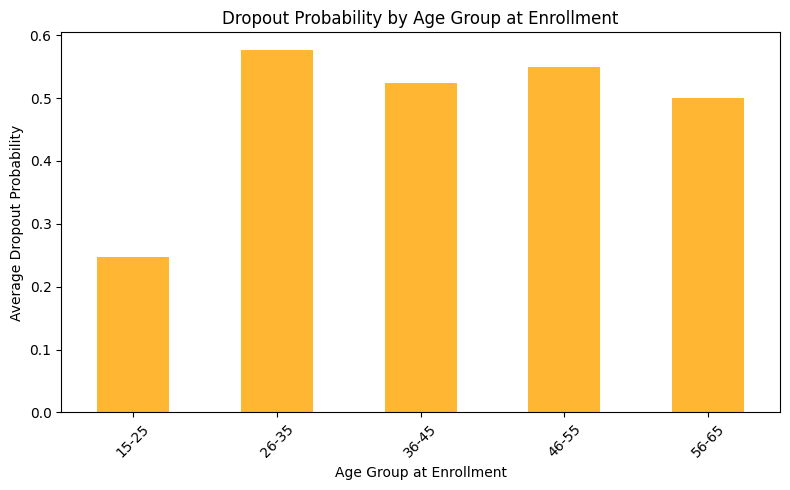

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate "Target_Dropout" based on other target columns
df_factors_encoded["Target_Dropout"] = (
    (~df_factors_encoded["Target_Enrolled"]) & (~df_factors_encoded["Target_Graduate"])
).astype(bool)  # Convert to True/False instead of 1/0

# Verify the generated "Target_Dropout" column
print("Value counts for 'Target_Dropout':")
print(df_factors_encoded["Target_Dropout"].value_counts())
print("-" * 40)

# Step 2: Bin "Age at enrollment" into age groups
age_bins = pd.cut(
    df_factors_encoded["Age at enrollment"],
    bins=[15, 25, 35, 45, 55, 65],
    labels=["15-25", "26-35", "36-45", "46-55", "56-65"]
)

# Step 3: Create a DataFrame for grouping
binned_data = pd.DataFrame({
    "Age Bin": age_bins,
    "Dropout Probability": df_factors_encoded["Target_Dropout"].astype(int)  # Convert back to int for calculations
})

# Step 4: Group by "Age Bin" and calculate the mean dropout probability
mean_probabilities = binned_data.groupby("Age Bin").mean()

# Verify the results
print("Mean dropout probability per Age Bin:")
print(mean_probabilities)
print("-" * 40)

# Step 5: Plot the results
plt.figure(figsize=(8, 5))
mean_probabilities["Dropout Probability"].plot(kind='bar', color='orange', alpha=0.8)

plt.ylabel("Average Dropout Probability")
plt.xlabel("Age Group at Enrollment")
plt.title("Dropout Probability by Age Group at Enrollment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Day/Evening attendance analisys**

- Daytime students tend to graduate more, the category is basically dominated by daytime students, Evening students graduate less which shows that evening students face challanges in completing their studies.
- Evening students have a higher dropout rate, since they have more presence there than in the Graduate.
- Gender seem to be less prominent when it comes to dropping out both males and females have similar patterns when it comes to dropping out, however, when it comes to graduating, females have way higher count of graduates.

<Figure size 800x500 with 0 Axes>

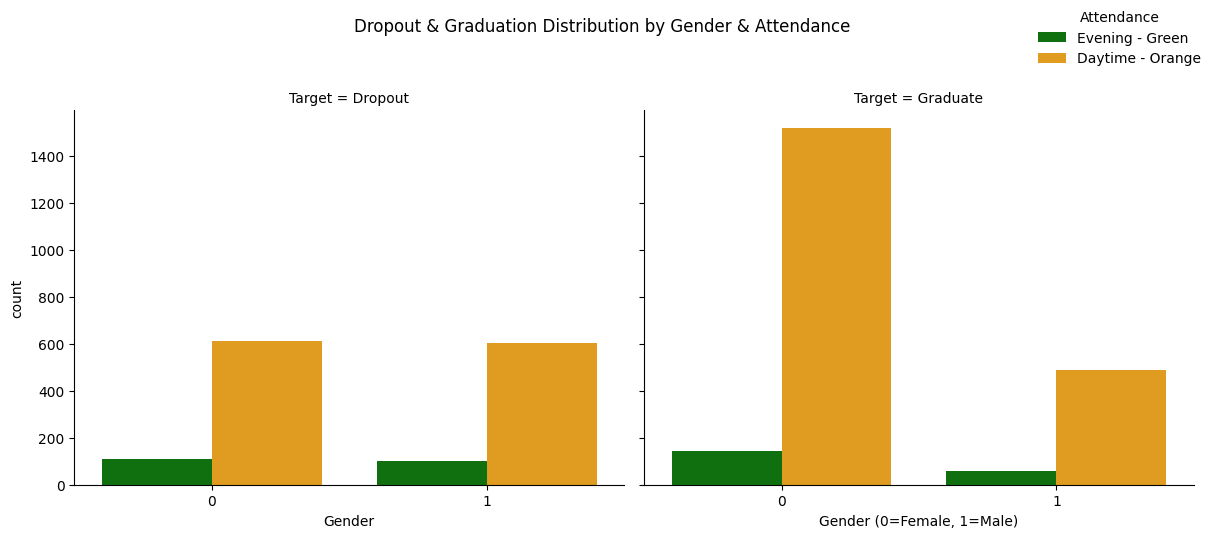

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df_factors[df_factors["Target"].isin(["Dropout", "Graduate"])]


# Creating the updated visualization
plt.figure(figsize=(8, 5))
g = sns.catplot(x="Gender", hue="Daytime/evening attendance", col="Target",
                data=df_filtered, kind="count", palette=["green", "orange"], height=5, aspect=1)

# Manually setting the correct legend
g._legend.set_title("Attendance")
g._legend.set_bbox_to_anchor((1, 1))  # Adjust position if needed
g._legend.texts[0].set_text("Evening - Green")
g._legend.texts[1].set_text("Daytime - Orange")

# Removing Seaborn's default legend from the plot
plt.legend([], [], frameon=False)

plt.suptitle("Dropout & Graduation Distribution by Gender & Attendance", y=1.05)
plt.xlabel("Gender (0=Female, 1=Male)")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()


**Day/Evening Students by Age Groups**

- Younger students attendend more daytime classes specifcally the 15-25 bin, this can relate to the younger students having less external responsabilities.
- Evening Studies is more common for older students, it increases with in ratio with age, probably related to those external responsabilities.
- Enrollment declines sharply after 35, education is pursued by younger folks as opposed to those older, this could suggest a barrier of entry or lack of necessity to pursue college.

<ipython-input-27-f0178466ccd1>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_distribution = binned_data.groupby(["Age Bin", "Daytime Attendance"]).size().unstack()


<Figure size 1000x600 with 0 Axes>

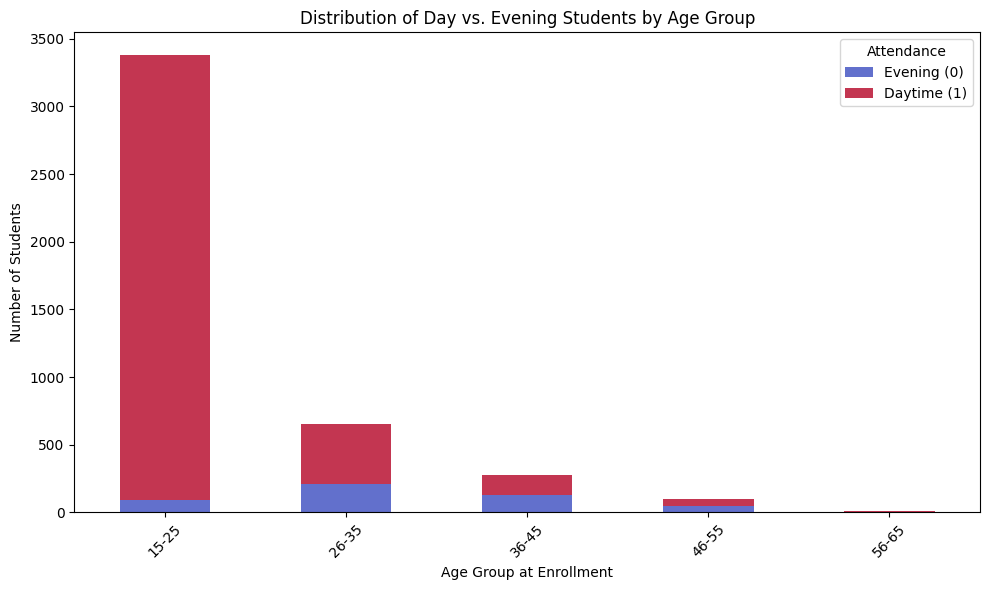

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reusing the age binning strategy from previous analysis
age_bins = pd.cut(
    df_factors_encoded["Age at enrollment"],
    bins=[15, 25, 35, 45, 55, 65],
    labels=["15-25", "26-35", "36-45", "46-55", "56-65"]
)

# Creating a DataFrame with Age Bin and Attendance type
binned_data = pd.DataFrame({
    "Age Bin": age_bins,
    "Daytime Attendance": df_factors_encoded["Daytime/evening attendance"]  # 1=Daytime, 0=Evening
})

# Counting students per age group for Daytime and Evening study
attendance_distribution = binned_data.groupby(["Age Bin", "Daytime Attendance"]).size().unstack()

# Plotting the distribution of Day vs. Evening students by age group
plt.figure(figsize=(10, 6))
attendance_distribution.plot(kind="bar", stacked=True, colormap="coolwarm", alpha=0.8, figsize=(10, 6))

# Formatting the plot
plt.xlabel("Age Group at Enrollment")
plt.ylabel("Number of Students")
plt.title("Distribution of Day vs. Evening Students by Age Group")
plt.legend(title="Attendance", labels=["Evening (0)", "Daytime (1)"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df_factors_encoded

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0.000000,0,10.8,1.4,1.74,True,False,False
1,1,6,1,11,1,1,1,1,3,4,...,6,6,13.666667,0,13.9,-0.3,0.79,False,False,True
2,1,1,5,5,1,1,1,22,27,10,...,0,0,0.000000,0,10.8,1.4,1.74,True,False,False
3,1,8,2,15,1,1,1,23,27,6,...,10,5,12.400000,0,9.4,-0.8,-3.12,False,False,True
4,2,12,1,3,0,1,1,22,28,10,...,6,6,13.000000,0,13.9,-0.3,0.79,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,8,5,12.666667,0,15.5,2.8,-4.06,False,False,True
4420,1,1,2,15,1,1,19,1,1,10,...,6,2,11.000000,0,11.1,0.6,2.02,True,False,False
4421,1,1,1,12,1,1,1,22,27,10,...,9,1,13.500000,0,13.9,-0.3,0.79,True,False,False
4422,1,1,1,9,1,1,1,22,27,8,...,6,5,12.000000,0,9.4,-0.8,-3.12,False,False,True


**Debt Impact Analysis**

- Higher Dropout Proportion Among Students in Debt: Students with debt have a significantly higher dropout proportion. This suggests that financial instability is a key factor contributing to students leaving their studies.

- Lower Dropout Proportion for Students Without Debt: Students with no debt exhibit a much lower dropout proportion. This indicates that financial stability is likely a protective factor against dropping out.

- Financial Support as a Critical Factor: The stark difference in dropout proportions between the two groups highlights the potential importance of financial aid programs or debt counseling to support students at risk of dropping out due to financial constraints.

<ipython-input-29-d2d932f40e91>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dropout_proportions = debtor_group.apply(lambda x: (x["Target_Dropout"]).mean())


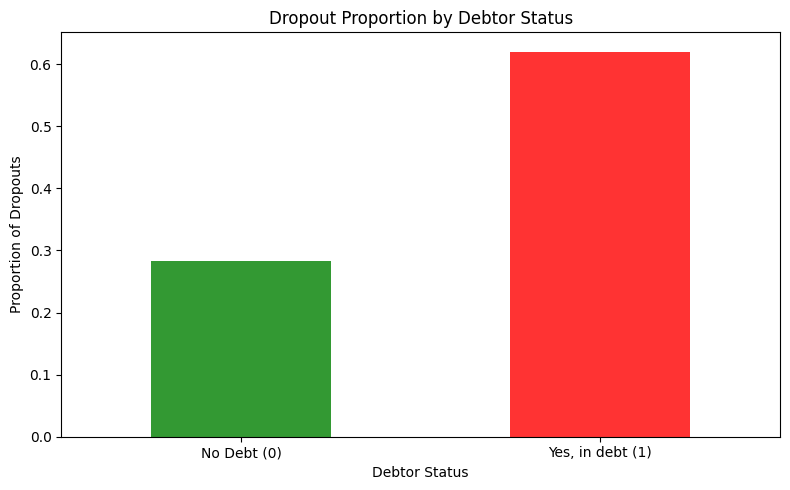

In [ ]:
# Assuming your DataFrame is called df_factors
# Replace "Debtor" and "Target" with your actual column names

# Grouping data by the "Debtor" column
debtor_group = df_factors_encoded.groupby("Debtor")

# Calculating dropout proportions for debtors and non-debtors
dropout_proportions = debtor_group.apply(lambda x: (x["Target_Dropout"]).mean())

# Plotting a bar chart
plt.figure(figsize=(8, 5))
dropout_proportions.plot(kind='bar', color=['green', 'red'], alpha=0.8)
plt.ylabel("Proportion of Dropouts")
plt.xlabel("Debtor Status")
plt.title("Dropout Proportion by Debtor Status")
plt.xticks(ticks=[0, 1], labels=["No Debt (0)", "Yes, in debt (1)"], rotation=0)
plt.tight_layout()
plt.show()


**Effects of Gender in dropouts, analysis**

- Higher Dropout Proportion Among Males: Males (Gender = 1) have a significantly higher dropout proportion compared to females (Gender = 0). This suggests that male students may face more challenges or external factors that contribute to dropping out.

- Lower Dropout Proportion for Females: Females exhibit a much lower dropout proportion. This may indicate better academic performance, stronger support systems, or other factors that contribute to persistence in their studies.
Gender-Specific Factors:

- The noticeable difference in dropout rates between genders highlights the importance of exploring potential causes. This might include differences in societal expectations, learning environments, or access to resources.

<ipython-input-30-fea10d2481bf>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gender_dropout_proportions = gender_group.apply(lambda x: (x["Target_Dropout"]).mean())


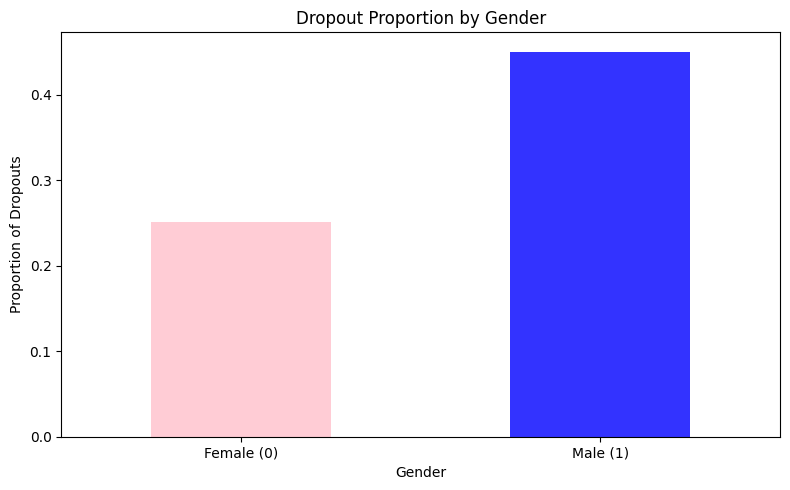

In [ ]:
# Grouping data by the "Gender" column
gender_group = df_factors_encoded.groupby("Gender")

# Calculating dropout proportions for each gender
gender_dropout_proportions = gender_group.apply(lambda x: (x["Target_Dropout"]).mean())

# Plotting a bar chart
plt.figure(figsize=(8, 5))
gender_dropout_proportions.plot(kind='bar', color=['pink', 'blue'], alpha=0.8)
plt.ylabel("Proportion of Dropouts")
plt.xlabel("Gender")
plt.title("Dropout Proportion by Gender")
plt.xticks(ticks=[0, 1], labels=["Female (0)", "Male (1)"], rotation=0)
plt.tight_layout()
plt.show()


**Dropouts in proportion to Tuition Fees Status**

- High Dropout Proportion for Students Not Up-to-Date on Tuition: Students whose tuition fees are not up to date have a very high dropout proportion, exceeding 80%. This highlights that financial difficulties and unpaid fees are strongly associated with students leaving their studies.

- Low Dropout Proportion for Students Up-to-Date on Tuition: Students who have their tuition fees up-to-date exhibit a much lower dropout proportion (below 20%). This suggests that financial stability is a protective factor against dropping out.

- Clear Financial Barrier to Academic Success: The stark difference between the two groups underscores the critical role that financial factors play in student retention. Ensuring students can meet their financial obligations may directly reduce dropout rates.


<ipython-input-31-ef1935dd417a>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dropout_proportions = fees_group.apply(lambda x: (x["Target_Dropout"]).mean())


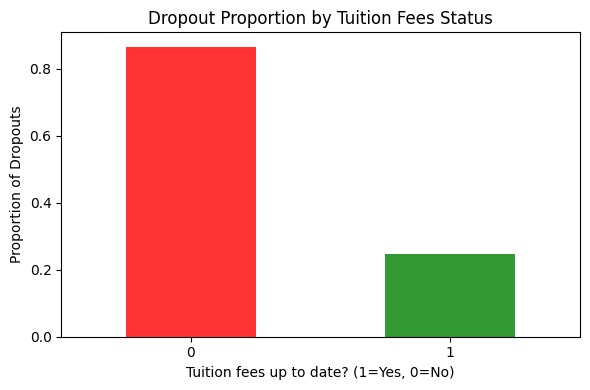

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping data by "Tuition fees up to date"
fees_group = df_factors_encoded.groupby("Tuition fees up to date")

# Calculating dropout proportions for each fee status
dropout_proportions = fees_group.apply(lambda x: (x["Target_Dropout"]).mean())

# Plotting a bar chart
plt.figure(figsize=(6, 4))
dropout_proportions.plot(kind='bar', color=['red', 'green'], alpha=0.8)
plt.title("Dropout Proportion by Tuition Fees Status")
plt.xlabel("Tuition fees up to date? (1=Yes, 0=No)")
plt.ylabel("Proportion of Dropouts")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


 **Analysis of the Relationship Between Tuition Fee Status and Dropout Rates**

Key takeaways are:

Students with tuition fees up to date (1=Yes):
*   The majority of students in this category did not drop out (75.3%).
*   A smaller proportion of these students dropped out (24.7%).



Students with tuition fees not up to date (0=No):
*   The majority of students in this category dropped out (86.6%).
*   Only a small proportion of these students did not drop out (13.4%).


Tuition fee status is strongly associated with dropout rates:

*   Students who keep their tuition fees up to date are significantly likely to drop out.less
*   Students who do not keep their tuition fees up to date have a very high dropout rate.

***Implications:***

Financial stability: Ensuring tuition fees are up to date may reflect a student's financial stability or their ability to continue their studies without external challenges

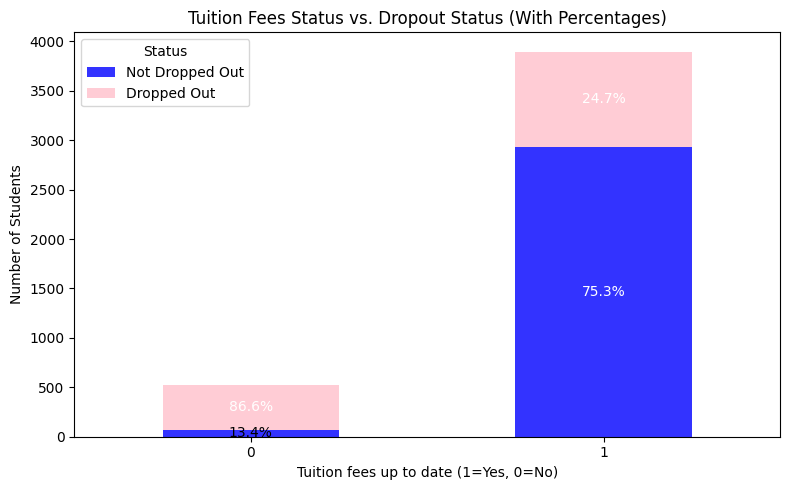

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab for Tuition fees vs. Target_Dropout
ct = pd.crosstab(df_factors_encoded["Tuition fees up to date"], df_factors_encoded["Target_Dropout"])

# Calculate percentages for each row
ct_percentage = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart
ax = ct.plot(kind="bar", stacked=True, figsize=(8, 5), color=["blue", "pink"], alpha=0.8)

# Add percentage labels
for i, (index, row) in enumerate(ct_percentage.iterrows()):
    cumulative = 0
    for j, value in enumerate(row):
        cumulative += ct.iloc[i, j]  # Accumulate actual counts for positioning
        percentage = value  # Percentage value
        ax.text(
            i,  # X position (bar index)
            cumulative - ct.iloc[i, j] / 2,  # Y position (middle of the bar segment)
            f'{percentage:.1f}%',  # Format as percentage
            ha='center',  # Center alignment
            va='center',  # Vertical alignment
            fontsize=10,  # Font size
            color='white' if percentage > 15 else 'black',  # Adjust color for visibility
        )

# Customize chart
plt.title("Tuition Fees Status vs. Dropout Status (With Percentages)")
plt.xlabel("Tuition fees up to date (1=Yes, 0=No)")
plt.ylabel("Number of Students")
plt.legend(["Not Dropped Out", "Dropped Out"], title="Status")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


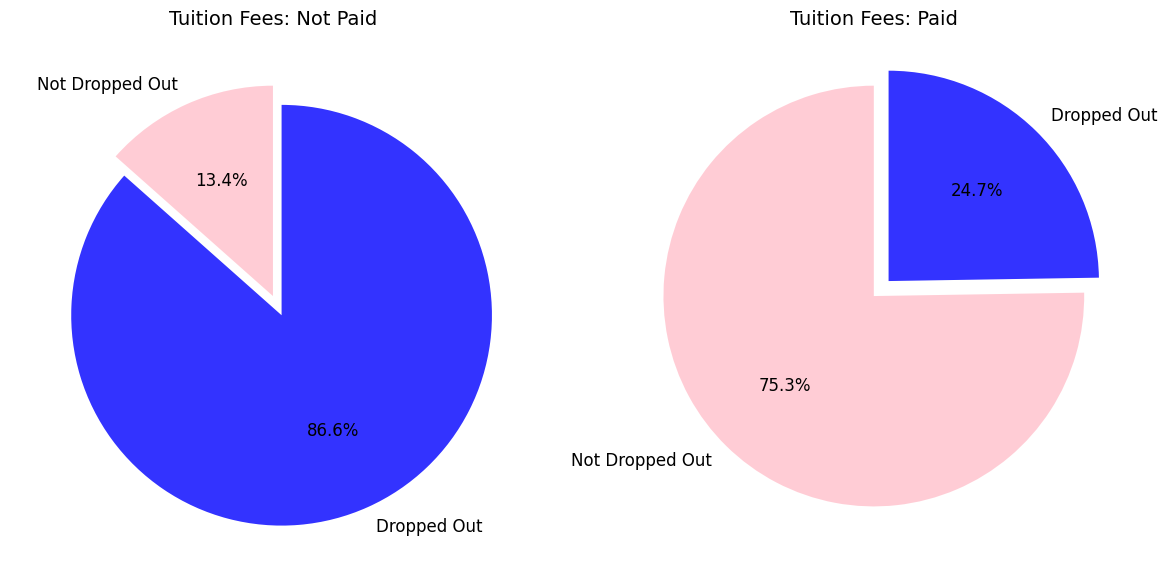

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab for Tuition fees vs. Target_Dropout
ct = pd.crosstab(df_factors_encoded["Tuition fees up to date"], df_factors_encoded["Target_Dropout"])

# Define colors and explode for better visualization
colors = ["pink", "blue"]
explode = (0, 0.1)  # Slightly separate "Dropped Out"

# Create a subplot with 1 row and 2 columns for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Loop through each row in the crosstab and create a pie chart
for i, (index, row) in enumerate(ct.iterrows()):
    labels = ["Not Dropped Out", "Dropped Out"]
    sizes = row

    # Plot pie chart in the appropriate subplot
    axes[i].pie(
        sizes,
        labels=labels,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors,
        explode=explode,
        wedgeprops={"alpha": 0.8},
        textprops={"fontsize": 12},
    )

    # Add title for each subplot
    axes[i].set_title(f"Tuition Fees: {'Paid' if index == 1 else 'Not Paid'}", fontsize=14)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()



**Key Takeaways from tuition fees and age group in relation to dropout status**

- Unpaid Tuition as a Major Risk Factor: Regardless of age, students with unpaid tuition are significantly more likely to drop out.

- Additional Challenges for Older Students: Even when tuition is paid, dropout rates increase slightly for older age groups, highlighting the need for tailored support.

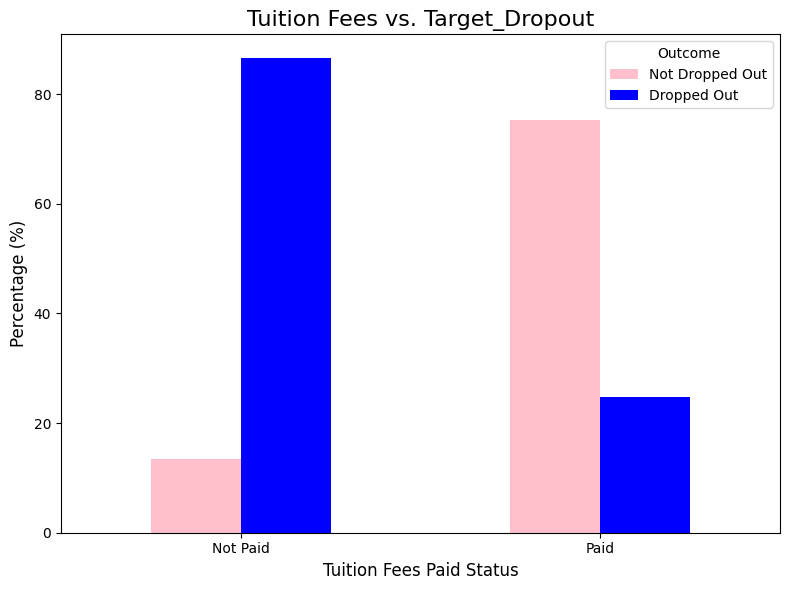

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


ct = pd.crosstab(df_factors_encoded["Tuition fees up to date"], df_factors_encoded["Target_Dropout"])

ct_percentage = ct.div(ct.sum(axis=1), axis=0) * 100


ct_percentage.plot(kind="bar", figsize=(8, 6), color=["pink", "blue"])
plt.title("Tuition Fees vs. Target_Dropout", fontsize=16)
plt.xlabel("Tuition Fees Paid Status", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Not Paid", "Paid"], rotation=0)
plt.legend(["Not Dropped Out", "Dropped Out"], title="Outcome")
plt.tight_layout()
plt.show()


<ipython-input-35-bc7fd8ad93ae>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_factors_encoded.groupby(["Tuition fees up to date", age_bins])["Target_Dropout"].mean().unstack(0)


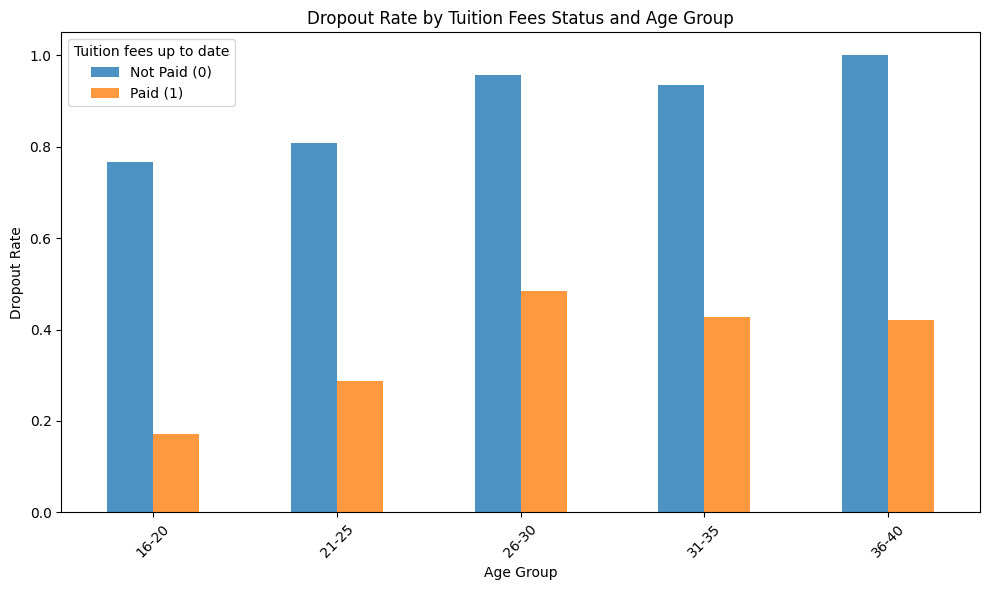

In [ ]:
# Bin age into groups for analysis
age_bins = pd.cut(df_factors_encoded["Age at enrollment"], bins=[16, 20, 25, 30, 35, 40], labels=["16-20", "21-25", "26-30", "31-35", "36-40"])

# Group by Tuition fees and Age bins, then calculate mean dropout rate
grouped = df_factors_encoded.groupby(["Tuition fees up to date", age_bins])["Target_Dropout"].mean().unstack(0)

# Plot a grouped bar chart
grouped.plot(kind="bar", figsize=(10, 6), alpha=0.8)

plt.title("Dropout Rate by Tuition Fees Status and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Dropout Rate")
plt.legend(["Not Paid (0)", "Paid (1)"], title="Tuition fees up to date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


=========================================================================
========================================================================


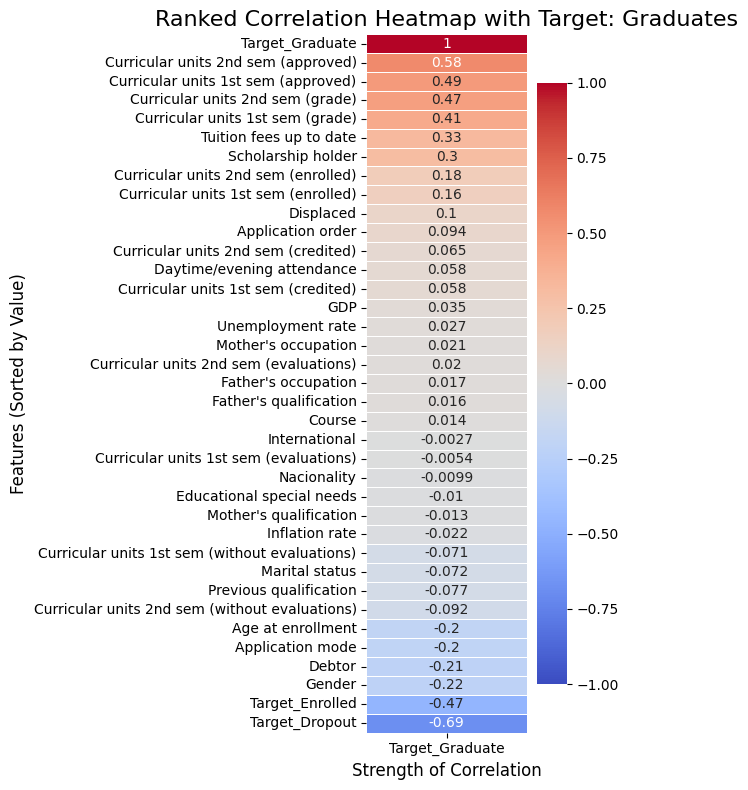

In [ ]:
# Sort the correlation coefficients with the target variable Target_Graduate in descending order,
# and visualize the strength of correlations using a heatmap.

sorted_corr = correlation_matrix[['Target_Graduate']].sort_values(
    by='Target_Graduate', ascending=False
)


plt.figure(figsize=(6, 8))
sns.heatmap(
    sorted_corr,
    annot=True,
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    vmin=-1,
    vmax=1
)

plt.title("Ranked Correlation Heatmap with Target: Graduates", fontsize=16)
plt.xlabel("Strength of Correlation", fontsize=12)
plt.ylabel("Features (Sorted by Value)", fontsize=12)
plt.tight_layout()
plt.show()


**Impact of Scholarships:**


*   Students with scholarships have significantly higher graduation rates, especially those in the Scholarship & No Debt group.
*   Scholarships effectively reduce financial pressure, allowing students to focus more on their studies.


**Impact of Debt:**

*   Students with debt have lower graduation rates, particularly those in the No Scholarship & Debt group.
*   Financial pressure from debt has a significant negative impact on students' academic progress.

**Key Takeaways**

*   Whether students receive scholarships and whether they have debt significantly impact graduation rates.
*   Students with scholarships and no debt (Scholarship & No Debt) have the highest graduation rate.
*   Students without scholarships and with debt (No Scholarship & Debt) have the lowest graduation rate.

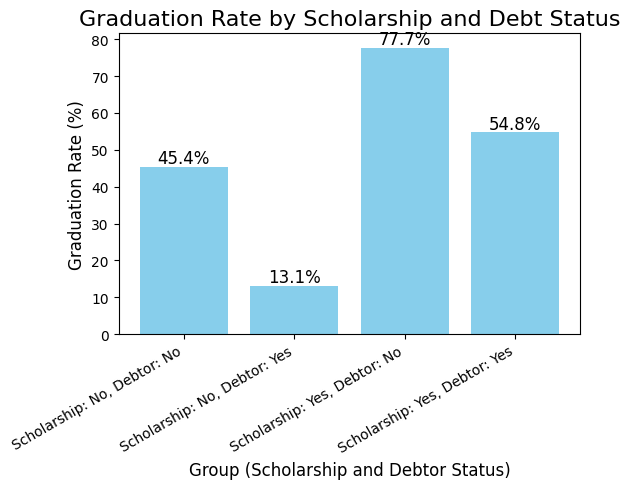

In [ ]:
import matplotlib.pyplot as plt

# Create "Group" column temporarily within assign() method
grouped_data = (
    df_factors_encoded
    .assign(
        Group="Scholarship: " + df_factors_encoded["Scholarship holder"].map({1: "Yes", 0: "No"}) +
              ", Debtor: " + df_factors_encoded["Debtor"].map({1: "Yes", 0: "No"})
    )
    .groupby("Group")["Target_Graduate"]
    .mean() * 100
)

plt.figure(figsize=(6, 5))
bars = plt.bar(grouped_data.index, grouped_data.values, color="skyblue")

# Add text labels above bars
for bar, value in zip(bars, grouped_data.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f"{value:.1f}%",
        ha="center",
        fontsize=12,
    )

# Formatting
plt.title("Graduation Rate by Scholarship and Debt Status", fontsize=16)
plt.ylabel("Graduation Rate (%)", fontsize=12)
plt.xlabel("Group (Scholarship and Debtor Status)", fontsize=12)
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.tight_layout()

plt.show()


<ipython-input-37-30e36114536e>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data.groupby("Age Bin")["Scholarship"]


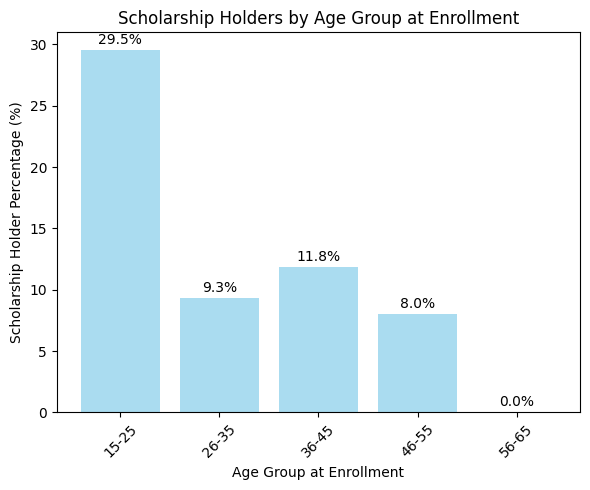

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Bin "Age at enrollment" into age groups
age_bins = pd.cut(
    df_factors_encoded["Age at enrollment"],
    bins=[15, 25, 35, 45, 55, 65],
    labels=["15-25", "26-35", "36-45", "46-55", "56-65"]
)

# Step 2: Create a DataFrame for grouping
binned_data = pd.DataFrame({
    "Age Bin": age_bins,
    "Scholarship": df_factors_encoded["Scholarship holder"]
})

# Step 3: Group by "Age Bin" and calculate the percentage of scholarship holders
scholarship_distribution = (
    binned_data.groupby("Age Bin")["Scholarship"]
    .mean() * 100  # Convert proportion to percentage
)

# Step 4: Plot the results
plt.figure(figsize=(6, 5))
bars = plt.bar(scholarship_distribution.index, scholarship_distribution.values, color="skyblue", alpha=0.7)

# Add text labels above bars
for bar, value in zip(bars, scholarship_distribution.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f"{value:.1f}%",
        ha="center",
        fontsize=10,
    )

# Formatting
plt.ylabel("Scholarship Holder Percentage (%)")
plt.xlabel("Age Group at Enrollment")
plt.title("Scholarship Holders by Age Group at Enrollment")
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


# *Young Age Group Dominates Scholarships:*

The 15-25 age group has the highest percentage of scholarship holders at 29.5%, significantly surpassing all other age groups.
This suggests that younger students are more likely to qualify for or receive scholarships, possibly due to specific eligibility criteria or higher academic engagement at this stage.
Decline in Scholarship Holders with Age:

There is a noticeable drop in the percentage of scholarship holders as the age group increases:
26-35: 9.3%
36-45: 11.8%
46-55: 8.0%
56-65: 0.0%
This pattern could reflect reduced access to scholarships for older students, potentially due to fewer programs targeting non-traditional or returning students.

> Add blockquote



========================================================================
========================================================================

### **Modeling**

In [ ]:
print(df_factors_encoded.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_factors_encoded.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0.000000,0,10.8,1.4,1.74,True,False,False
1,1,6,1,11,1,1,1,1,3,4,...,6,6,13.666667,0,13.9,-0.3,0.79,False,False,True
2,1,1,5,5,1,1,1,22,27,10,...,0,0,0.000000,0,10.8,1.4,1.74,True,False,False
3,1,8,2,15,1,1,1,23,27,6,...,10,5,12.400000,0,9.4,-0.8,-3.12,False,False,True
4,2,12,1,3,0,1,1,22,28,10,...,6,6,13.000000,0,13.9,-0.3,0.79,False,False,True


In [ ]:
print(df_factors_encoded["Target_Dropout"].value_counts())

Target_Dropout
False    3003
True     1421
Name: count, dtype: int64


 # **Drop Out ☹☹☹☹☹☹**


*The target dropout is highly imbalanced, so we address this issue using an undersampling approach.*

In [ ]:
df_factors_sampled = df_factors_encoded.sample(frac=1, random_state=42)
split_index = int(len(df_factors_sampled) * 0.8)
print(split_index)
train_df = df_factors_sampled.iloc[:split_index]
test_df = df_factors_sampled[split_index:]

3539


In [ ]:
true_df = train_df[train_df['Target_Dropout']]

false_df = train_df[train_df['Target_Dropout'] == False]

print(len(true_df), len(false_df))

false_df_sampled = false_df.sample(n=len(true_df), random_state=42)


fusion_train_df = pd.concat([true_df, false_df_sampled], ignore_index=True).sample(frac=1, random_state=42)
fusion_train_df

1150 2389


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
741,1,8,1,4,1,1,1,1,4,10,...,10,0,0.000000,0,16.2,0.3,-0.92,True,False,False
1917,2,14,1,3,0,1,1,22,29,10,...,7,7,13.571429,0,16.2,0.3,-0.92,False,False,True
208,2,12,1,17,0,1,1,22,14,10,...,8,4,11.800000,0,10.8,1.4,1.74,True,False,False
1546,1,1,1,11,1,1,1,13,1,4,...,6,4,13.250000,0,16.2,0.3,-0.92,False,False,True
282,4,12,1,8,1,12,1,22,28,10,...,0,0,0.000000,0,15.5,2.8,-4.06,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1,17,1,4,1,16,1,3,28,20,...,14,11,12.000000,0,8.9,1.4,3.51,False,False,True
1095,1,1,2,15,1,1,1,1,14,5,...,1,0,0.000000,0,12.7,3.7,-1.70,True,False,False
1130,1,1,1,14,1,1,1,1,1,10,...,10,3,10.333333,0,10.8,1.4,1.74,True,False,False
1294,2,14,1,12,1,1,1,22,27,10,...,8,8,13.813750,0,9.4,-0.8,-3.12,False,False,True


In [ ]:
X_train = fusion_train_df.drop(columns=['Target_Dropout', 'Target_Graduate', 'Target_Enrolled'])
y_train = fusion_train_df['Target_Dropout']

X_test = test_df.drop(columns=['Target_Dropout', 'Target_Graduate', 'Target_Enrolled'])
y_test = test_df['Target_Dropout']

In [ ]:
print(y_train.value_counts(normalize=True))

Target_Dropout
True     0.5
False    0.5
Name: proportion, dtype: float64


## RandomForestClassifier-Drop Out Accuracy: 0.86/f1 0.77 ☹
## Ann Model Accuracy: 0.86/f1 0.77 ☹
## XGBOOST Accuracy: 0.85/f1 0.77 ☹
## SVM Accuracy: 0.85/f1 0.77 ☹

In [ ]:
#New Version
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=8, min_samples_split=10, min_samples_leaf=5)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, rf_y_pred):.2f}")

from sklearn.model_selection import cross_val_score
# Assuming X and y were defined earlier for cross-validation, use X_train and y_train instead:
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Random Forest Mean CV Accuracy: {rf_cv_scores.mean():.2f}")

Random Forest Test Accuracy: 0.86
Random Forest Cross-Validation Scores: [0.85652174 0.8326087  0.84130435 0.86086957 0.82608696]
Random Forest Mean CV Accuracy: 0.84


#New Version
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=8, min_samples_split=10, min_samples_leaf=5)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, rf_y_pred):.2f}")

from sklearn.model_selection import cross_val_score
# Assuming X and y were defined earlier for cross-validation, use X_train and y_train instead:
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Random Forest Mean CV Accuracy: {rf_cv_scores.mean():.2f}")

Accuracy: 0.86
Precision: 0.76
Recall: 0.79
F1 Score: 0.77


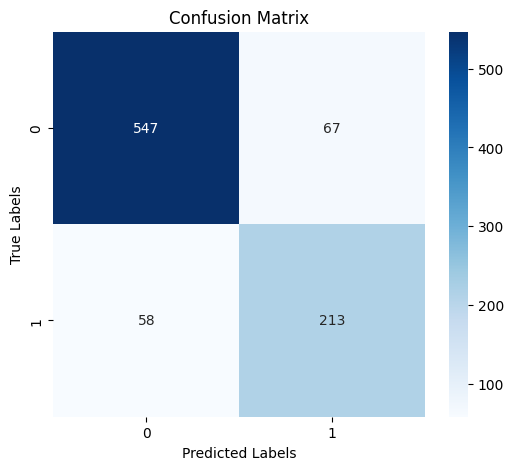

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions using the Logistic Regression model
y_pred = rf_model.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Ann Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


y_pred_ann = (model.predict(X_test) > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6466 - loss: 0.8364 - val_accuracy: 0.8237 - val_loss: 0.4127
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7898 - loss: 0.4475 - val_accuracy: 0.8305 - val_loss: 0.3846
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8092 - loss: 0.4174 - val_accuracy: 0.8136 - val_loss: 0.4145
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8094 - loss: 0.4122 - val_accuracy: 0.8565 - val_loss: 0.3608
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8284 - loss: 0.3890 - val_accuracy: 0.8655 - val_loss: 0.3440
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8296 - loss: 0.3844 - val_accuracy: 0.8554 - val_loss: 0.3629
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8364 - loss: 0.3700 - val_accuracy: 0.8452 - val_loss: 0.3744
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8473 - loss: 0.3495 - val_accuracy: 0.8655 - val_loss

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.89      0.90       614
        True       0.76      0.79      0.77       271

    accuracy                           0.86       885
   macro avg       0.83      0.84      0.84       885
weighted avg       0.86      0.86      0.86       885



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:21:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.85
XGBoost Precision: 0.72
XGBoost Recall: 0.82
XGBoost F1 Score: 0.77


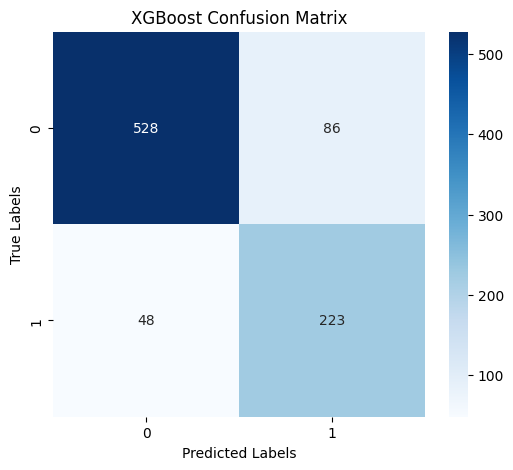

In [ ]:
# XGBOOST
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

# Print Metrics
print(f"XGBoost Accuracy: {accuracy:.2f}")
print(f"XGBoost Precision: {precision:.2f}")
print(f"XGBoost Recall: {recall:.2f}")
print(f"XGBoost F1 Score: {f1:.2f}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Insight:
Combined Analysis
Academic Progress is the Key Factor:

Academic-related features (e.g., course completion, evaluation scores) are shown to be the most significant contributors to graduation outcomes in both charts, emphasizing the dominant role of academic performance.
Economic Factors Matter:

Timely payment of tuition fees (Tuition fees up to date) is highlighted in both charts, suggesting that financial stability has a direct impact on academic success.
The Role of Scholarships Requires Further Investigation:

Although Scholarship holder ranks lower in importance, its negative correlation raises interesting questions, such as whether scholarship recipients face higher academic pressure or other challenges.
Low-Impact Features Can Be Considered for Removal:

Features with minimal influence (e.g., GDP, Inflation rate, Nationality) could be removed to simplify the dataset and improve model efficiency.


SVM Accuracy: 0.85
SVM Precision: 0.74
SVM Recall: 0.79
SVM F1 Score: 0.77


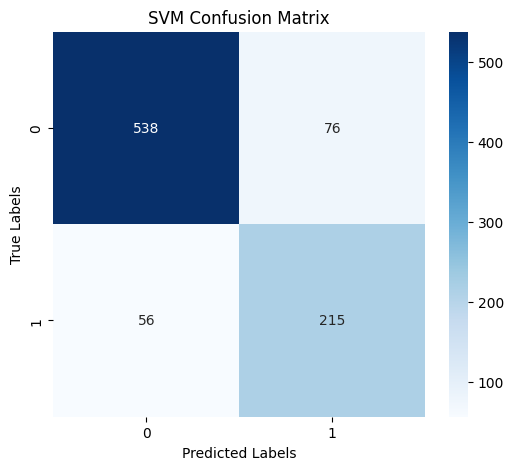

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train SVM Model
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

# Print Metrics
print(f"SVM Accuracy: {accuracy:.2f}")
print(f"SVM Precision: {precision:.2f}")
print(f"SVM Recall: {recall:.2f}")
print(f"SVM F1 Score: {f1:.2f}")

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


 # **Graduate ✅ ✅ ✅ ✅ ✅:**

In [ ]:
print(df_factors_encoded["Target_Graduate"].value_counts())

Target_Graduate
False    2215
True     2209
Name: count, dtype: int64


In [ ]:
X_train_graduate = df_factors_encoded.drop(columns=['Target_Dropout', 'Target_Graduate', 'Target_Enrolled'])
y_train_graduate = df_factors_encoded['Target_Graduate']

X_test_graduate = df_factors_encoded.drop(columns=['Target_Dropout', 'Target_Graduate', 'Target_Enrolled'])
y_test_graduate = df_factors_encoded['Target_Graduate']


In [ ]:
print("Training set Target_Graduate distribution:")
print(y_train_graduate.value_counts())


Training set Target_Graduate distribution:
Target_Graduate
False    2215
True     2209
Name: count, dtype: int64


## RandomForestClassifier-Drop Out Accuracy: 0.86/f1 0.88 ✅
## Ann Model Accuracy: 0.86/f1 0.86 ✅
## XGBOOST Accuracy: 0.99/f1 0.99 ✅
## SVM Accuracy: 0.84/f1 0.85 ✅

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score


rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5
)
rf_model.fit(X_train_graduate, y_train_graduate)


rf_y_pred_graduate = rf_model.predict(X_test_graduate)

# Accuracy
print(f"Random Forest Test Accuracy: {accuracy_score(y_test_graduate, rf_y_pred_graduate):.2f}")

# F1-score
print(f"Random Forest F1 Score: {f1_score(y_test_graduate, rf_y_pred_graduate, average='binary'):.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Test Accuracy: 0.88
Random Forest F1 Score: 0.88


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Ensure X_train_graduate and X_test_graduate are NumPy arrays
X_train_graduate = np.array(X_train_graduate)
X_test_graduate = np.array(X_test_graduate)

# Ensure y_train_graduate and y_test_graduate are NumPy arrays and properly reshaped
y_train_graduate = np.array(y_train_graduate).reshape(-1, 1)
y_test_graduate = np.array(y_test_graduate).reshape(-1, 1)

# Define the ANN model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_graduate.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_graduate, y_train_graduate, epochs=20, batch_size=32, validation_data=(X_test_graduate, y_test_graduate))

# Make predictions and convert probabilities to binary values (0 or 1)
y_pred_ann_graduate = (model.predict(X_test_graduate) > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_graduate, y_pred_ann_graduate)
precision = precision_score(y_test_graduate, y_pred_ann_graduate)
recall = recall_score(y_test_graduate, y_pred_ann_graduate)
f1 = f1_score(y_test_graduate, y_pred_ann_graduate)  # Fixed typo

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6917 - loss: 0.5874 - val_accuracy: 0.8169 - val_loss: 0.3902
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8142 - loss: 0.4008 - val_accuracy: 0.8343 - val_loss: 0.3609
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8294 - loss: 0.3773 - val_accuracy: 0.8427 - val_loss: 0.3491
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8333 - loss: 0.3647 - val_accuracy: 0.8418 - val_loss: 0.3480
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8293 - loss: 0.3655 - val_accuracy: 0.8495 - val_loss: 0.3430
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8529 - loss: 0.3407 - val_accuracy: 0.8479 - val_loss: 0.3363
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8420 - loss: 0.3514 - val_accuracy: 0.8565 - val_loss: 0.3294
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8455 - loss: 0.3460 - val_accuracy: 0

XGBoost Accuracy: 0.99
XGBoost Precision: 0.99
XGBoost Recall: 1.00
XGBoost F1 Score: 0.99


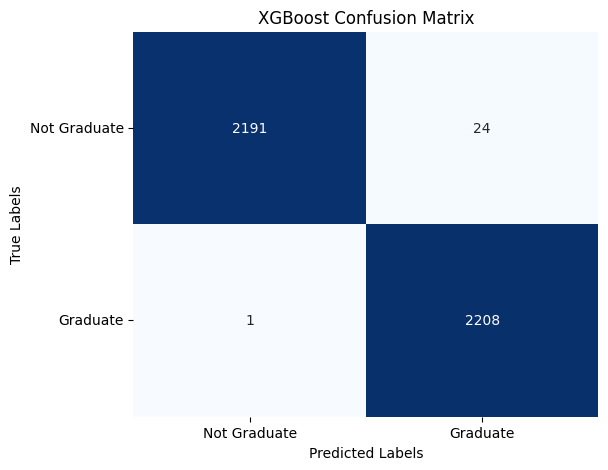

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Ensure X_train_graduate and X_test_graduate are NumPy arrays
X_train_graduate = np.array(X_train_graduate)
X_test_graduate = np.array(X_test_graduate)

# Ensure y_train_graduate and y_test_graduate are NumPy arrays
y_train_graduate = np.array(y_train_graduate).reshape(-1,)
y_test_graduate = np.array(y_test_graduate).reshape(-1,)

# Train XGBoost Model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_graduate, y_train_graduate)

# Make Predictions
y_pred_xgb_graduate = xgb_model.predict(X_test_graduate)

# Compute Metrics
accuracy = accuracy_score(y_test_graduate, y_pred_xgb_graduate)
precision = precision_score(y_test_graduate, y_pred_xgb_graduate)
recall = recall_score(y_test_graduate, y_pred_xgb_graduate)
f1 = f1_score(y_test_graduate, y_pred_xgb_graduate)

# Print Metrics
print(f"XGBoost Accuracy: {accuracy:.2f}")
print(f"XGBoost Precision: {precision:.2f}")
print(f"XGBoost Recall: {recall:.2f}")
print(f"XGBoost F1 Score: {f1:.2f}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test_graduate, y_pred_xgb_graduate)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("XGBoost Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=["Not Graduate", "Graduate"])
plt.yticks(ticks=[0.5, 1.5], labels=["Not Graduate", "Graduate"], rotation=0)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.84
SVM Precision: 0.81
SVM Recall: 0.89
SVM F1 Score: 0.85


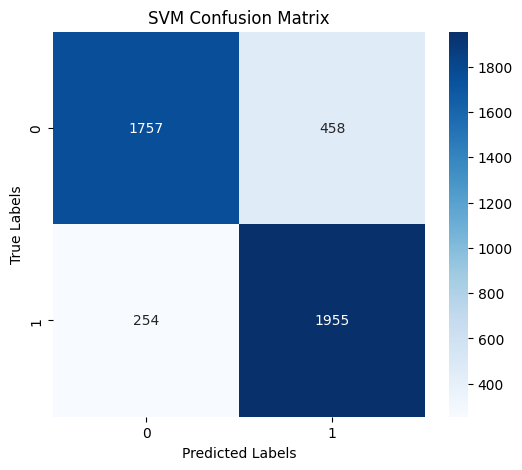

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train SVM Model
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_graduate, y_train_graduate)

# Predictions
y_pred_svm_graduate = svm_model.predict(X_test_graduate)

# Compute Metrics
accuracy = accuracy_score(y_test_graduate, y_pred_svm_graduate)
precision = precision_score(y_test_graduate, y_pred_svm_graduate)
recall = recall_score(y_test_graduate, y_pred_svm_graduate)
f1 = f1_score(y_test_graduate, y_pred_svm_graduate)

# Print Metrics
print(f"SVM Accuracy: {accuracy:.2f}")
print(f"SVM Precision: {precision:.2f}")
print(f"SVM Recall: {recall:.2f}")
print(f"SVM F1 Score: {f1:.2f}")

# Confusion Matrix
cm_svm = confusion_matrix(y_test_graduate, y_pred_svm_graduate)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


SVM Accuracy: 0.84
SVM Precision: 0.81
SVM Recall: 0.89
SVM F1 Score: 0.85


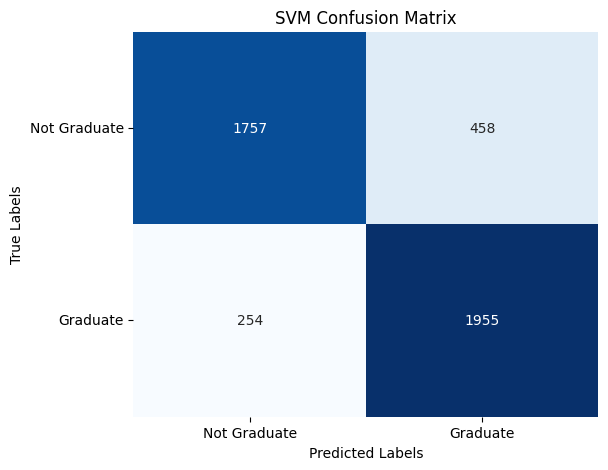

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Ensure X_train_graduate and X_test_graduate are NumPy arrays
X_train_graduate = np.array(X_train_graduate)
X_test_graduate = np.array(X_test_graduate)

# Ensure y_train_graduate and y_test_graduate are NumPy arrays
y_train_graduate = np.array(y_train_graduate).reshape(-1,)
y_test_graduate = np.array(y_test_graduate).reshape(-1,)

# Train SVM Model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_graduate, y_train_graduate)

# Make Predictions
y_pred_svm = svm_model.predict(X_test_graduate)

# Compute Metrics
accuracy = accuracy_score(y_test_graduate, y_pred_svm)
precision = precision_score(y_test_graduate, y_pred_svm)
recall = recall_score(y_test_graduate, y_pred_svm)
f1 = f1_score(y_test_graduate, y_pred_svm)  # Fixed typo

# Print Metrics
print(f"SVM Accuracy: {accuracy:.2f}")
print(f"SVM Precision: {precision:.2f}")
print(f"SVM Recall: {recall:.2f}")
print(f"SVM F1 Score: {f1:.2f}")

# Confusion Matrix
cm_svm = confusion_matrix(y_test_graduate, y_pred_svm)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("SVM Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=["Not Graduate", "Graduate"])
plt.yticks(ticks=[0.5, 1.5], labels=["Not Graduate", "Graduate"], rotation=0)
plt.show()


 ========================================================================
  ========================================================================


 # **Others try ** ❓❓❓❓❓❓

In [ ]:
df_factors['International'].value_counts()
#0 not international
#1 we international babyyyy

,count
International,
0,4314
1,110


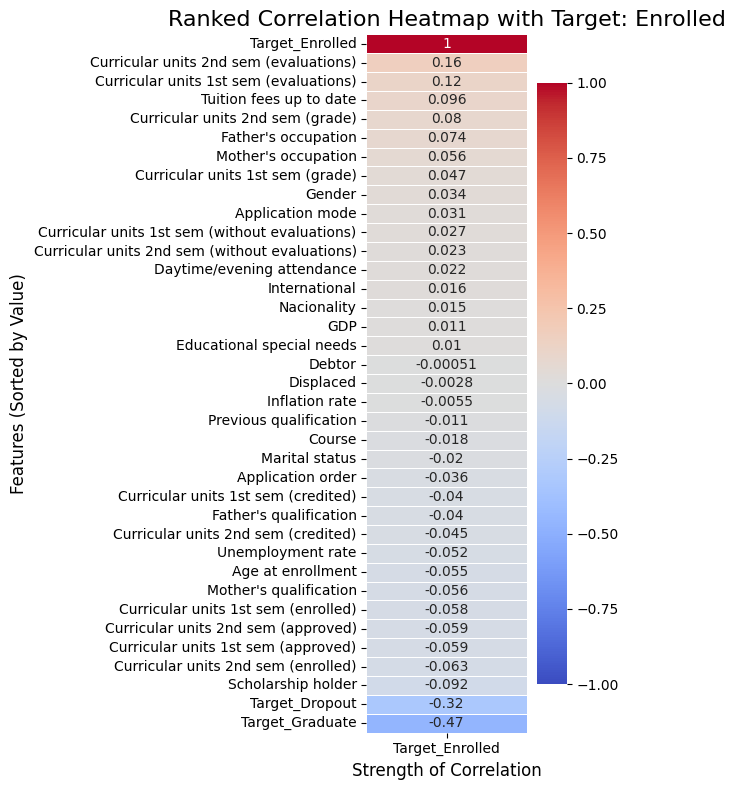

In [ ]:
# Sort the correlation coefficients with the target variable Target_Graduate in descending order,
# and visualize the strength of correlations using a heatmap.

sorted_corr = correlation_matrix[['Target_Enrolled']].sort_values(
    by='Target_Enrolled', ascending=False
)


plt.figure(figsize=(6, 8))
sns.heatmap(
    sorted_corr,
    annot=True,
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    vmin=-1,
    vmax=1
)

plt.title("Ranked Correlation Heatmap with Target: Enrolled", fontsize=16)
plt.xlabel("Strength of Correlation", fontsize=12)
plt.ylabel("Features (Sorted by Value)", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# SMOTE for unbalence dataset -- SMOTE doesn't help
from imblearn.over_sampling import SMOTE

X = df_factors_encoded.drop(columns=['Target_Dropout'])
y = df_factors_encoded['Target_Dropout']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())
# False: 3003, True: 3003

Target_Dropout
True     3003
False    3003
Name: count, dtype: int64


NameError: name 'debt_groups_international' is not defined

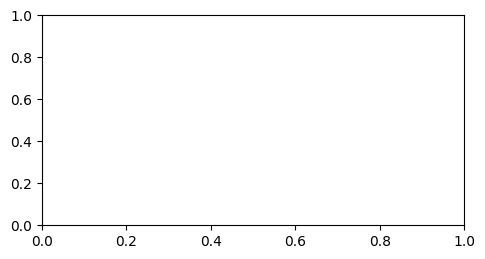

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
bar_width = 0.35
x_pos_international = np.arange(2)
x_pos_non_international = x_pos_international + bar_width
plt.bar(x_pos_international, debt_groups_international.values, bar_width, label="International", color="blue")
plt.bar(x_pos_non_international, debt_groups_non_international.values, bar_width, label="Non-International", color="orange")
#Setting x-axis ticks and labels
plt.xticks(x_pos_international + bar_width / 2, ["No Debt", "In Debt"])
plt.xlabel("Debtor Status")
plt.ylabel("Proportion of Dropouts")
plt.title("International Students vs Debtor Status and Dropouts")
plt.legend()

plt.subplot(2, 2, 2)
gender_labels = ["Male", "Female"]
plt.bar(gender_groups_international.index, gender_groups_international.values, label="International", color="blue")
plt.bar(gender_groups_non_international.index, gender_groups_non_international.values, label="Non-International", color="orange")
plt.xticks(range(len(gender_labels)), gender_labels)
plt.xlabel("Gender")
plt.ylabel("Proportion of Dropouts")
plt.title("International Students vs Gender and Dropouts")
plt.legend()

plt.tight_layout()
plt.show()

========================================================================
========================================================================
# **Feature Engineering**
## 👾👾👾👾👾👾👾👾👾👾

In [ ]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Target_Dropout
True     0.5
False    0.5
Name: proportion, dtype: float64
Target_Dropout
False    0.693785
True     0.306215
Name: proportion, dtype: float64


# **Remove low importance** ❌❌❌❌❌❌❌❌

In [ ]:
print(len(X_train.columns))

34


✅ Feature name count matches XGBoost feature importance length.


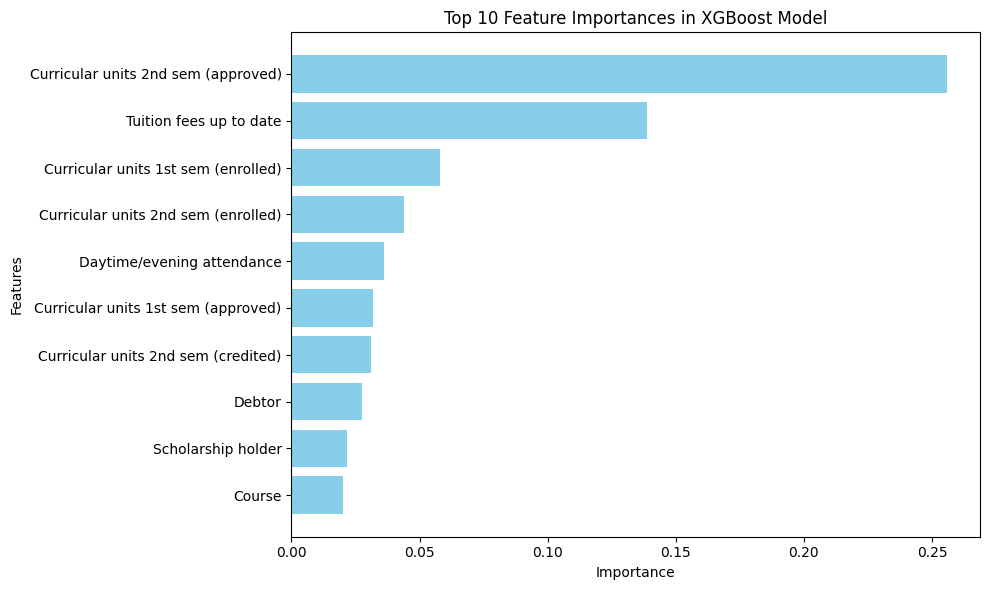

Full Feature Importance Ranking:
                                           Feature  Importance
28             Curricular units 2nd sem (approved)    0.255959
14                         Tuition fees up to date    0.138809
20             Curricular units 1st sem (enrolled)    0.057896
26             Curricular units 2nd sem (enrolled)    0.043951
4                       Daytime/evening attendance    0.036293
22             Curricular units 1st sem (approved)    0.031790
25             Curricular units 2nd sem (credited)    0.031152
13                                          Debtor    0.027588
16                              Scholarship holder    0.021841
3                                           Course    0.020204
19             Curricular units 1st sem (credited)    0.020177
2                                Application order    0.019290
30  Curricular units 2nd sem (without evaluations)    0.019252
17                               Age at enrollment    0.019017
6                     

In [ ]:
# XGBoost check importance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Ensure feature names match the model training data
feature_names = X_train.columns  # Use original X_train features

# Extract feature importance from the trained XGBoost model
feature_importances = xgb_model.feature_importances_

# Check if feature names and feature importances have the same length
if len(feature_names) != len(feature_importances):
    print(f"⚠️ Mismatch detected: {len(feature_names)} features in X_train, "
          f"but {len(feature_importances)} in the XGBoost model.")
    feature_names = feature_names[:len(feature_importances)]  # Adjust if necessary
else:
    print("✅ Feature name count matches XGBoost feature importance length.")

# Create a DataFrame for feature importance ranking
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
top_features = importance_df.head(10)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances in XGBoost Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print full feature importance ranking
print("Full Feature Importance Ranking:")
print(importance_df)


In [ ]:
X_train_aligned, X_test_aligned = X_train.align(X_test, join='inner', axis=1)
print(f"✅ Aligned Features: {X_train_aligned.shape[1]} features")

✅ Aligned Features: 34 features


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Get feature importances in sorted order
importance_threshold = 0.01  # Adjust based on your needs
important_features = importance_df[importance_df['Importance'] > importance_threshold]['Feature'].tolist()

# Use these features for selection
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Verify dimensions
print(f"Original features: {X_train.shape[1]}")
print(f"Selected features: {X_train_selected.shape[1]}")
removed_features = set(X_train.columns) - set(X_train_selected.columns)
print("🚫 Features removed after selection:", removed_features)

Original features: 34
Selected features: 30
🚫 Features removed after selection: {'International', 'Curricular units 1st sem (without evaluations)', 'Previous qualification', 'Educational special needs'}


In [ ]:
# Update XGBoost parameters to be more explicit
xgb_model_selected = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    eval_metric='logloss'
)

# Remove use_label_encoder parameter as it's deprecated
# Train model with selected features
xgb_model_selected.fit(X_train_selected, y_train)

# Make predictions and evaluate
y_pred_selected = xgb_model_selected.predict(X_test_selected)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_and_plot(y_true, y_pred, model_name):
    """
    Evaluate a model's performance and plot its confusion matrix.

    Parameters:
    - y_true: Array-like of true labels.
    - y_pred: Array-like of predicted labels.
    - model_name: String representing the model's name.

    Returns:
    - None
    """
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Print metrics
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()



XGBoost (Selected Features) Results:
Accuracy: 0.86
Precision: 0.75
Recall: 0.82
F1 Score: 0.79


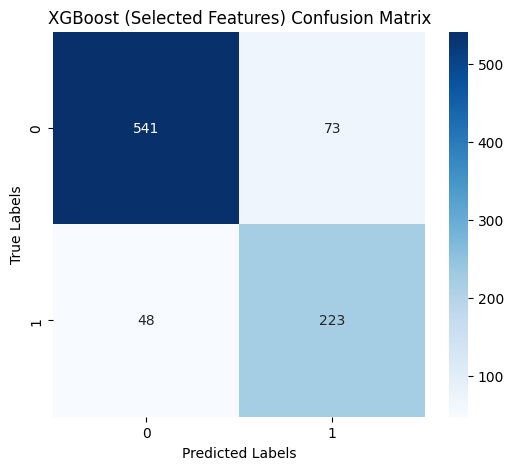

In [ ]:
# Evaluate and plot confusion matrix for XGBoost (Selected Features)
evaluate_and_plot(y_test, y_pred_selected, "XGBoost (Selected Features)")


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

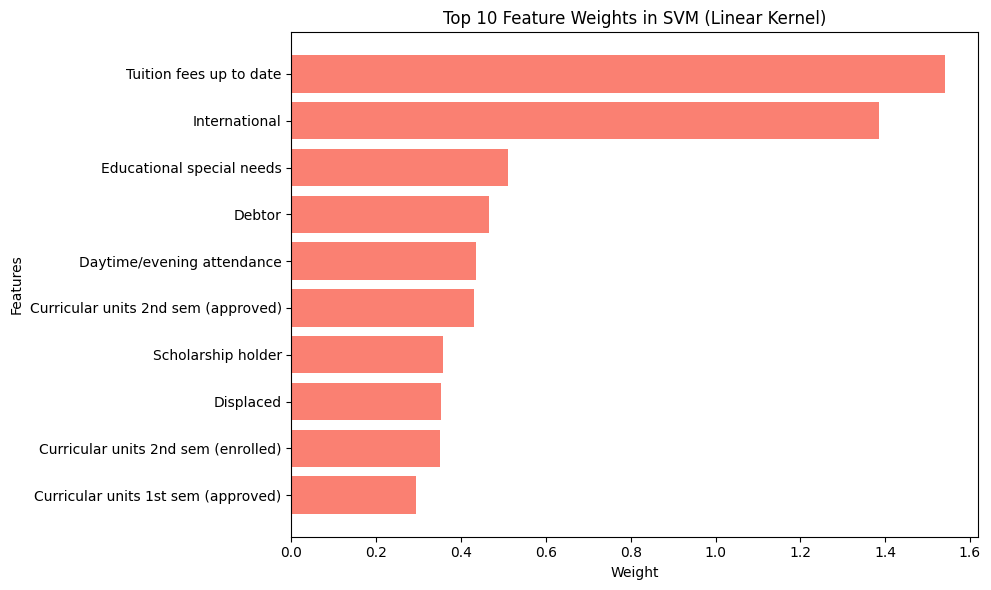

SVM (Linear Kernel) Full Feature Weight Ranking:
                                           Feature    Weight
14                         Tuition fees up to date  1.541711
18                                   International  1.386583
12                       Educational special needs  0.510332
13                                          Debtor  0.466021
4                       Daytime/evening attendance  0.435421
28             Curricular units 2nd sem (approved)  0.430958
16                              Scholarship holder  0.356493
11                                       Displaced  0.352999
26             Curricular units 2nd sem (enrolled)  0.349280
22             Curricular units 1st sem (approved)  0.294194
24  Curricular units 1st sem (without evaluations)  0.180606
19             Curricular units 1st sem (credited)  0.126723
25             Curricular units 2nd sem (credited)  0.126482
6                                      Nacionality  0.121448
15                                  

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Train SVM with linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Extract feature weights (only for linear kernel)
svm_feature_weights = np.abs(svm_model.coef_[0])

# Create DataFrame for feature weights
svm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Weight': svm_feature_weights
}).sort_values(by='Weight', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(svm_importance_df['Feature'].head(10), svm_importance_df['Weight'].head(10), color='salmon')
plt.xlabel('Weight')
plt.ylabel('Features')
plt.title('Top 10 Feature Weights in SVM (Linear Kernel)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print full feature weight ranking
print("SVM (Linear Kernel) Full Feature Weight Ranking:")
print(svm_importance_df)


Features to drop based on SVM: ['Application mode', "Father's qualification", 'Curricular units 2nd sem (grade)']

SVM After Feature Selection Results:
Accuracy: 0.88
Precision: 0.78
Recall: 0.82
F1 Score: 0.80


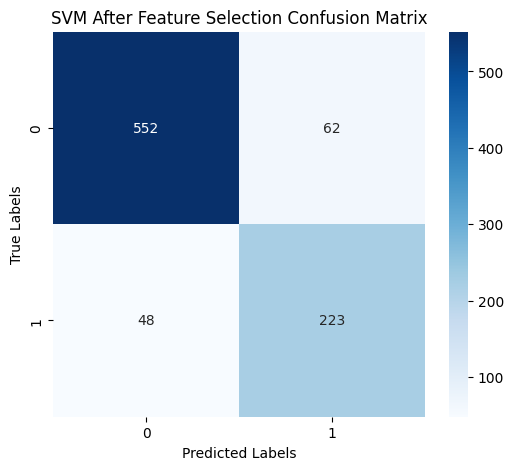

In [ ]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np

# 1. Train a temporary SVM model to get feature importance (coefficients)
svm_model_temp = SVC(kernel='linear', random_state=42)
svm_model_temp.fit(X_train_selected, y_train)

# Extract absolute coefficients as feature importance
svm_importances = np.abs(svm_model_temp.coef_).flatten()

# Create a DataFrame to store feature importance
svm_importance_df = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Importance': svm_importances
}).sort_values(by='Importance', ascending=False)

# 2. Identify low-importance features based on a threshold
importance_threshold = 0.01
features_to_drop_svm = svm_importance_df[svm_importance_df['Importance'] < importance_threshold]['Feature'].tolist()

print(f"Features to drop based on SVM: {features_to_drop_svm}")

# 3. Drop low-importance features
X_train_svm = X_train.drop(columns=features_to_drop_svm, errors='ignore')
X_test_svm = X_test.drop(columns=features_to_drop_svm, errors='ignore')

# 4. Train the final SVM model with selected features
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_svm, y_train)
y_pred_svm = svm_model.predict(X_test_svm)


evaluate_and_plot(y_test, y_pred_svm, "SVM After Feature Selection")


In [ ]:
# Verify dimensions
print(f"Original features: {X_train.shape[1]}")
print(f"Selected features: {X_train_svm.shape[1]}")
removed_features = set(X_train.columns) - set(X_train_svm.columns)
print("🚫 Features removed after selection:", removed_features)

Original features: 34
Selected features: 31
🚫 Features removed after selection: {'Curricular units 2nd sem (grade)', "Father's qualification", 'Application mode'}


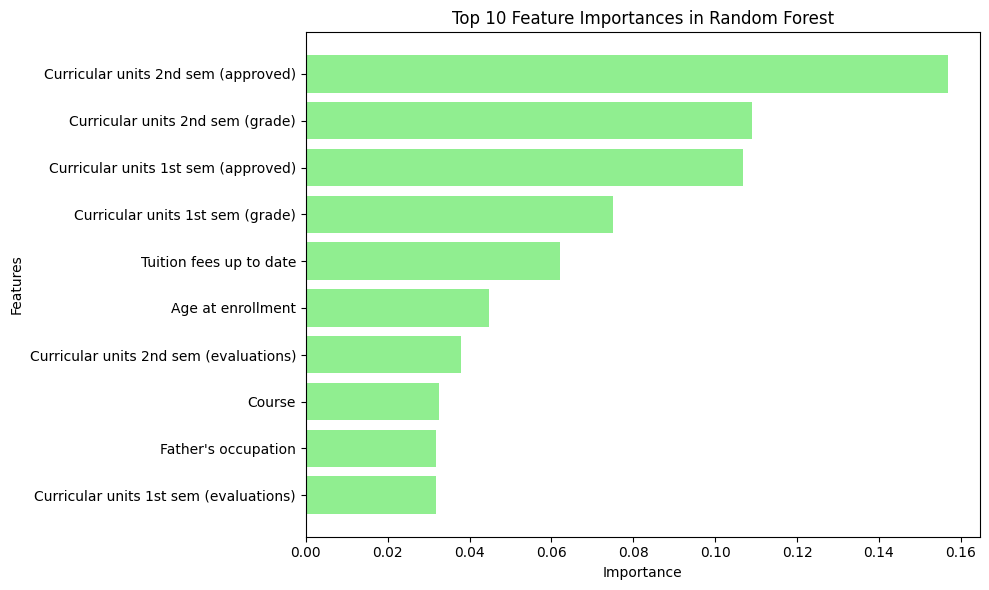

Random Forest Full Feature Importance Ranking:
                                           Feature  Importance
28             Curricular units 2nd sem (approved)    0.156829
29                Curricular units 2nd sem (grade)    0.109001
22             Curricular units 1st sem (approved)    0.106847
23                Curricular units 1st sem (grade)    0.075058
14                         Tuition fees up to date    0.062178
17                               Age at enrollment    0.044679
27          Curricular units 2nd sem (evaluations)    0.037951
3                                           Course    0.032564
10                             Father's occupation    0.031910
21          Curricular units 1st sem (evaluations)    0.031858
9                              Mother's occupation    0.029020
8                           Father's qualification    0.023198
1                                 Application mode    0.022737
7                           Mother's qualification    0.022084
33      

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importance
rf_feature_importances = rf_model.feature_importances_

# Create DataFrame for feature importance
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'].head(10), rf_importance_df['Importance'].head(10), color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances in Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print full feature importance ranking
print("Random Forest Full Feature Importance Ranking:")
print(rf_importance_df)


Features to drop based on Random Forest: ['Displaced', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (without evaluations)', 'Marital status', 'Nacionality', 'Daytime/evening attendance']

Random Forest After Feature Selection Results:
Accuracy: 0.87
Precision: 0.76
Recall: 0.82
F1 Score: 0.79


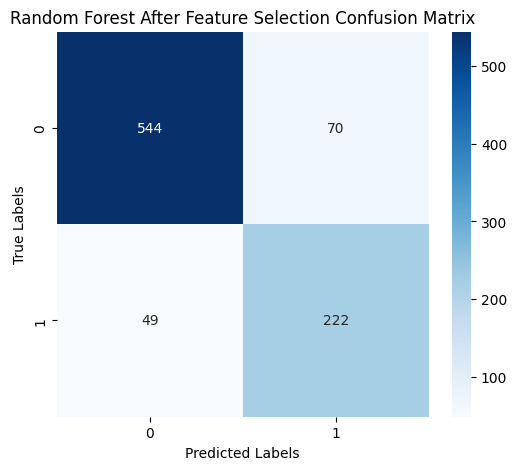

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Train a temporary Random Forest model to get feature importance
rf_model_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_temp.fit(X_train_selected, y_train)

# Extract feature importance
rf_importances = rf_model_temp.feature_importances_

# Create a DataFrame to store feature importance
rf_importance_df = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# 2. Identify low-importance features based on a threshold
importance_threshold = 0.01  # Adjust this based on experimentation
features_to_drop_rf = rf_importance_df[rf_importance_df['Importance'] < importance_threshold]['Feature'].tolist()

print(f"Features to drop based on Random Forest: {features_to_drop_rf}")

# 3. Drop low-importance features
X_train_rf = X_train_selected.drop(columns=features_to_drop_rf, errors='ignore')
X_test_rf = X_test_selected.drop(columns=features_to_drop_rf, errors='ignore')

# 4. Train the final Random Forest model with selected features
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_rf, y_train)

# 5. Make predictions
y_pred_rf = rf_model.predict(X_test_rf)

# 6. Use the evaluate_and_plot function
evaluate_and_plot(y_test, y_pred_rf, "Random Forest After Feature Selection")


In [ ]:
# Verify dimensions
print(f"Original features: {X_train.shape[1]}")
print(f"Selected features: {X_train_rf.shape[1]}")
removed_features = set(X_train.columns) - set(X_train_rf.columns)
print("🚫 Features removed after selection:", removed_features)

Original features: 34
Selected features: 24
🚫 Features removed after selection: {'International', 'Nacionality', 'Curricular units 2nd sem (without evaluations)', 'Marital status', 'Displaced', 'Educational special needs', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Previous qualification', 'Daytime/evening attendance'}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

✅ Selected Features for ANN: ['Curricular units 2nd sem (approved)', 'Curricular units 1st sem (approved)', 'Course', 'Tuition fees up to date', 'Curricular units 2nd sem (enrolled)', 'Nacionality', 'Debtor', 'Curricular units 1st sem (enrolled)', 'Age at enrollment']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

ANN After Feature Selection Results:
Accuracy: 0.87
Precision: 0.79
Recall: 0.78
F1 Score: 0.79


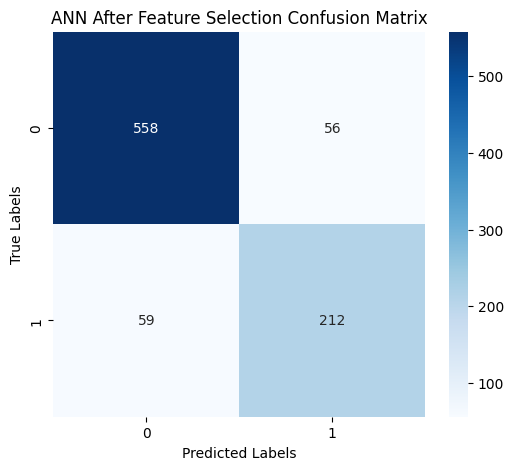


🔥 Final Selected Features After Feature Selection:
['Curricular units 2nd sem (approved)', 'Curricular units 1st sem (approved)', 'Course', 'Tuition fees up to date', 'Curricular units 2nd sem (enrolled)', 'Nacionality', 'Debtor', 'Curricular units 1st sem (enrolled)', 'Age at enrollment']


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# 1. Scale Features for ANN
scaler = StandardScaler()
X_train_ann = scaler.fit_transform(X_train)
X_test_ann = scaler.transform(X_test)

# 2. Define ANN Model
ann_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_ann.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 3. Compile ANN Model
ann_model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# 4. Train ANN Model
ann_model.fit(X_train_ann, y_train, epochs=10, batch_size=32, verbose=0)

# 5. Make Predictions
y_pred_ann = (ann_model.predict(X_test_ann) > 0.5).astype(int).flatten()


# 6. Use SHAP to Explain ANN Model
explainer = shap.Explainer(ann_model, X_train_ann)
shap_values = explainer(X_test_ann[:100])

# 7. Compute Mean Absolute SHAP Values per Feature
shap_importance = np.abs(shap_values.values).mean(axis=0)

# 8. Create DataFrame of Feature Importances
shap_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': shap_importance
}).sort_values(by='Importance', ascending=False)

# 9. Set Threshold & Drop Low Importance Features
importance_threshold = 0.03  # 🔥 Set the threshold for feature selection
selected_features = shap_importance_df[shap_importance_df['Importance'] > importance_threshold]['Feature'].tolist()

print("\n✅ Selected Features for ANN:", selected_features)

# 10. Filter Training and Testing Data
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

# 11. Re-scale the filtered features
X_train_ann_filtered = scaler.fit_transform(X_train_filtered)
X_test_ann_filtered = scaler.transform(X_test_filtered)

# 12. Retrain ANN Model with Selected Features
ann_model_filtered = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_ann_filtered.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
ann_model_filtered.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
ann_model_filtered.fit(X_train_ann_filtered, y_train, epochs=10, batch_size=32, verbose=0)

# 13. Make Predictions after Feature Selection
y_pred_ann_filtered = (ann_model_filtered.predict(X_test_ann_filtered) > 0.5).astype(int).flatten()

# 14. Evaluate Performance
evaluate_and_plot(y_test, y_pred_ann_filtered, "ANN After Feature Selection")

# 15. Print Final Selected Features
print("\n🔥 Final Selected Features After Feature Selection:")
print(selected_features)


In [ ]:
# Convert back to DataFrame after scaling
X_train_ann_filtered = pd.DataFrame(X_train_ann_filtered, columns=X_train_filtered.columns)
X_test_ann_filtered = pd.DataFrame(X_test_ann_filtered, columns=X_test_filtered.columns)

# Compare features
removed_features = set(X_train.columns) - set(X_train_filtered.columns)
print("🚫 Features removed after selection:", removed_features)


🚫 Features removed after selection: {'International', 'Curricular units 1st sem (evaluations)', "Mother's occupation", 'Curricular units 2nd sem (credited)', 'Application order', 'Curricular units 2nd sem (without evaluations)', "Mother's qualification", 'Displaced', 'Inflation rate', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (evaluations)', 'Marital status', 'Curricular units 1st sem (grade)', 'Gender', 'Curricular units 1st sem (credited)', 'Educational special needs', 'Application mode', "Father's qualification", 'Daytime/evening attendance', "Father's occupation", 'Scholarship holder', 'Unemployment rate', 'Previous qualification', 'GDP', 'Curricular units 2nd sem (grade)'}


# **Hyperparameter Tuning**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# ✅ Stage 1: Tune critical parameters (n_estimators and max_depth)
best_accuracy = 0
best_f1_score = 0
best_params = {
    'learning_rate': 0.1,       # Fixed learning rate
    'subsample': 0.8,           # Fixed other parameters
    'colsample_bytree': 0.8,
    'tree_method': 'hist',      # Use CPU-based histogram method
    'early_stopping_rounds': 10,
    'eval_metric': 'logloss',
    'random_state': 42
}

for n_estimators in [100, 200, 300]:
    for max_depth in [3, 6, 9]:
        model = XGBClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            **{k: v for k, v in best_params.items() if k not in ['n_estimators', 'max_depth']}
        )
        model.fit(
            X_train_selected, y_train,
            eval_set=[(X_test_selected, y_test)],
            verbose=False
        )
        y_pred = model.predict(X_test_selected)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_f1_score = f1
            best_params['n_estimators'] = n_estimators
            best_params['max_depth'] = max_depth
            print(f"🔥 Updated: Accuracy={accuracy:.4f}, F1 Score={f1:.4f}, Params={best_params}")

print("✅ Stage 1 Best Parameters:", best_params)

# ✅ Stage 2: Fine-tune learning rate and regularization parameter (reg_lambda)
learning_rates = [0.01, 0.05, 0.1]
reg_lambdas = [1.0, 10.0]

for lr in learning_rates:
    for reg_lambda in reg_lambdas:
        model_params = best_params.copy()
        model_params['learning_rate'] = lr
        model_params['reg_lambda'] = reg_lambda

        model = XGBClassifier(**model_params)
        model.fit(
            X_train_selected, y_train,
            eval_set=[(X_test_selected, y_test)],
            verbose=False
        )
        y_pred = model.predict(X_test_selected)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_f1_score = f1
            best_params['learning_rate'] = lr
            best_params['reg_lambda'] = reg_lambda
            print(f"🔥 Updated: Accuracy={accuracy:.4f}, F1 Score={f1:.4f}, Params={best_params}")

print("✅ Final Best Parameters:", best_params)
print(f"🚀 Best Accuracy: {best_accuracy:.2f}")
print(f"🚀 Best F1 Score: {best_f1_score:.2f}")


🔥 Updated: Accuracy=0.8667, F1 Score=0.7878, Params={'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8, 'tree_method': 'hist', 'early_stopping_rounds': 10, 'eval_metric': 'logloss', 'random_state': 42, 'n_estimators': 100, 'max_depth': 3}
✅ Stage 1 Best Parameters: {'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8, 'tree_method': 'hist', 'early_stopping_rounds': 10, 'eval_metric': 'logloss', 'random_state': 42, 'n_estimators': 100, 'max_depth': 3}
✅ Final Best Parameters: {'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8, 'tree_method': 'hist', 'early_stopping_rounds': 10, 'eval_metric': 'logloss', 'random_state': 42, 'n_estimators': 100, 'max_depth': 3}
🚀 Best Accuracy: 0.87
🚀 Best F1 Score: 0.79


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Stage 1: Tune C (Regularization Parameter) and Kernel
best_accuracy = 0
best_f1_score = 0
best_params = {}

for C in [0.1, 1, 10]:  # Iterate over different values of C
    for kernel in ['linear', 'rbf', 'poly']:  # Iterate over different kernels
        model = SVC(C=C, kernel=kernel, probability=True, random_state=42)
        model.fit(X_train_svm, y_train)
        y_pred_svm = model.predict(X_test_svm)

        accuracy = accuracy_score(y_test, y_pred_svm)
        f1 = f1_score(y_test, y_pred_svm)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_f1_score = f1
            best_params = {
                'C': C,
                'kernel': kernel
            }
            print(f"🔥 Updated: Accuracy={accuracy:.4f}, F1 Score={f1:.4f}, Params={best_params}")

print("\n✅ Stage 1 Best Parameters:", best_params)

# Stage 2: Fine-tune Gamma (for RBF and Poly Kernels)
if best_params['kernel'] in ['rbf', 'poly']:  # Gamma is only relevant for RBF and Poly kernels
    gamma_values = ['scale', 'auto', 0.01, 0.1, 1.0]

    for gamma in gamma_values:
        model = SVC(**best_params, gamma=gamma, probability=True, random_state=42)
        model.fit(X_train_svm, y_train)
        y_pred_svm = model.predict(X_test_svm)
        accuracy = accuracy_score(y_test, y_pred_svm)
        f1 = f1_score(y_test, y_pred_svm)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_f1_score = f1
            best_params.update({'gamma': gamma})
            print(f"🔥 Updated: Accuracy={accuracy:.4f}, F1 Score={f1:.4f}, Params={best_params}")

print("\n✅ Final Best Parameters:", best_params)
print(f"🚀 Best Accuracy: {best_accuracy:.2f}")
print(f"🚀 Best F1 Score: {best_f1_score:.2f}")


🔥 Updated: Accuracy=0.8757, F1 Score=0.8029, Params={'C': 0.1, 'kernel': 'linear'}

✅ Stage 1 Best Parameters: {'C': 0.1, 'kernel': 'linear'}

✅ Final Best Parameters: {'C': 0.1, 'kernel': 'linear'}
🚀 Best Accuracy: 0.88
🚀 Best F1 Score: 0.80


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

#  Stage 1: Tune n_estimators and max_depth
best_accuracy = 0
best_f1_score = 0
best_params = {}

n_estimators_list = [100, 200, 300]
max_depth_list = [3, 5, 7]

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42
        )
        model.fit(X_train_rf, y_train)
        y_pred_rf = model.predict(X_test_rf)
        accuracy = accuracy_score(y_test, y_pred_rf)
        f1 = f1_score(y_test, y_pred_rf)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_f1_score = f1
            best_params = {
                'n_estimators': n_estimators,
                'max_depth': max_depth
            }
            print(f"🔥 Updated: Accuracy={accuracy:.4f}, F1 Score={f1:.4f}, Params={best_params}")

print("\n✅ Stage 1 Best Parameters:", best_params)

# Stage 2: Fine-tune min_samples_split and min_samples_leaf
min_samples_splits = [2, 5, 10]
min_samples_leaves = [1, 2, 4]

for min_samples_split in min_samples_splits:
    for min_samples_leaf in min_samples_leaves:
        # Create a new dictionary combining best_params from Stage 1 with new parameters
        params = best_params.copy()
        params.update({
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf
        })

        model = RandomForestClassifier(
            **params,  # ✅ Use combined parameters
            random_state=42
        )
        model.fit(X_train_rf, y_train)
        y_pred_rf = model.predict(X_test_rf)
        accuracy = accuracy_score(y_test, y_pred_rf)
        f1 = f1_score(y_test, y_pred_rf)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_f1_score = f1
            best_params.update({
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf
            })
            print(f"🔥 Updated: Accuracy={accuracy:.4f}, F1 Score={f1:.4f}, Params={best_params}")

print("\n✅ Final Best Parameters for Random Forest:", best_params)
print(f"🚀 Best Accuracy: {best_accuracy:.2f}")
print(f"🚀 Best F1 Score: {best_f1_score:.2f}")


🔥 Updated: Accuracy=0.8610, F1 Score=0.7784, Params={'n_estimators': 100, 'max_depth': 3}
🔥 Updated: Accuracy=0.8655, F1 Score=0.7840, Params={'n_estimators': 100, 'max_depth': 5}
🔥 Updated: Accuracy=0.8678, F1 Score=0.7877, Params={'n_estimators': 200, 'max_depth': 5}

✅ Stage 1 Best Parameters: {'n_estimators': 200, 'max_depth': 5}

✅ Final Best Parameters for Random Forest: {'n_estimators': 200, 'max_depth': 5}
🚀 Best Accuracy: 0.87
🚀 Best F1 Score: 0.79


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Set random seed for reproducibility
tf.random.set_seed(42)

# Step 1: Scale Features for ANN
scaler = StandardScaler()
X_train_ann_f2 = scaler.fit_transform(X_train_ann_filtered)
X_test_ann_f2 = scaler.transform(X_test_ann_filtered)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_ann_f2, y_train, test_size=0.2, random_state=42)

# Stage 1: Tune hidden layer sizes and activation functions
best_accuracy = 0
best_f1_score = 0
best_params = {}

for neurons_layer1 in [16, 32, 64]:  # Try different neuron sizes
    for neurons_layer2 in [8, 16, 32]:
        model = Sequential([
            Dense(neurons_layer1, activation='relu', input_shape=(X_train_ann_f2.shape[1],)),
            Dense(neurons_layer2, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

        # Use early stopping to prevent overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=50,  # Use a larger number of epochs with early stopping
            batch_size=32,
            callbacks=[early_stopping],
            verbose=0
        )

        # Evaluate on the validation set
        y_pred = (model.predict(X_val) > 0.5).astype(int).flatten()
        accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_f1_score = f1
            best_params = {
                'neurons_layer1': neurons_layer1,
                'neurons_layer2': neurons_layer2
            }
            print(f"🔥 Updated: Accuracy={accuracy:.4f}, F1 Score={f1:.4f}, Params={best_params}")

print("\n✅ Stage 1 Best Parameters:", best_params)

# Stage 2: Fine-tune the learning rate and batch size
learning_rates = [0.001, 0.01, 0.05]
batch_sizes = [16, 32, 64]

for lr in learning_rates:
    for batch_size in batch_sizes:
        model = Sequential([
            Dense(best_params['neurons_layer1'], activation='relu', input_shape=(X_train_ann_f2.shape[1],)),
            Dense(best_params['neurons_layer2'], activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

        # Use early stopping to prevent overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=50,  # Use a larger number of epochs with early stopping
            batch_size=batch_size,
            callbacks=[early_stopping],
            verbose=0
        )

        # Evaluate on the validation set
        y_pred = (model.predict(X_val) > 0.5).astype(int).flatten()
        accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_f1_score = f1
            best_params.update({
                'learning_rate': lr,
                'batch_size': batch_size
            })
            print(f"🔥 Updated: Accuracy={accuracy:.4f}, F1 Score={f1:.4f}, Params={best_params}")

print("\n✅ Final Best Parameters for ANN:", best_params)
print(f"🚀 Best Accuracy: {best_accuracy:.2f}")
print(f"🚀 Best F1 Score: {best_f1_score:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
🔥 Updated: Accuracy=0.8500, F1 Score=0.8435, Params={'neurons_layer1': 16, 'neurons_layer2': 8}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
🔥 Updated: Accuracy=0.8609, F1 Score=0.8519, Params={'neurons_layer1': 16, 'neurons_layer2': 16}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

✅ Stage 1 Best Parameters: {'neurons_layer1': 16, 'neurons_layer2': 16}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

✅ Final Best Parameters for ANN: {'neurons_layer1': 16, 'neurons_layer2': 16}
🚀 Best Accuracy: 0.86
🚀 Best F1 Score: 0.85


## **Next Feature Engineering** 👽👽👽👽👽👽

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_correlation(X_train, y_train, model_name):
    """
    Plot a heatmap showing the correlation between features and the target variable,
    sorted by correlation value (including sign).

    Parameters:
    - X_train: DataFrame containing the training features for the specific model.
    - y_train: Series containing the target variable.
    - model_name: String indicating the model name.

    Returns:
    - None
    """
    # Ensure X_train is a DataFrame
    if not isinstance(X_train, pd.DataFrame):
        X_train = pd.DataFrame(X_train, columns=[f"Feature_{i}" for i in range(X_train.shape[1])])

    # Ensure y_train is a Pandas Series
    if not isinstance(y_train, pd.Series):
        y_train = pd.Series(y_train, name="Target_Dropout")

    # Concatenate features and target
    df_corr = X_train.copy()
    df_corr['Target_Dropout'] = y_train

    # Calculate correlation matrix
    correlation_matrix = df_corr.corr()

    # Extract correlation with target variable & sort by correlation value (including sign)
    target_corr = correlation_matrix[['Target_Dropout']].drop(index=['Target_Dropout'])
    target_corr = target_corr.sort_values(by='Target_Dropout', ascending=False)

    # Plot heatmap with sorted correlations
    plt.figure(figsize=(6, len(target_corr) * 0.3))
    sns.heatmap(target_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
    plt.title(f"{model_name} - Feature Correlation Heatmap (Sorted by Correlation Value)")
    plt.show()

# Convert ANN NumPy array back to DataFrame
X_train_ann_df = pd.DataFrame(X_train_ann_f2, columns=X_train_ann_filtered.columns)



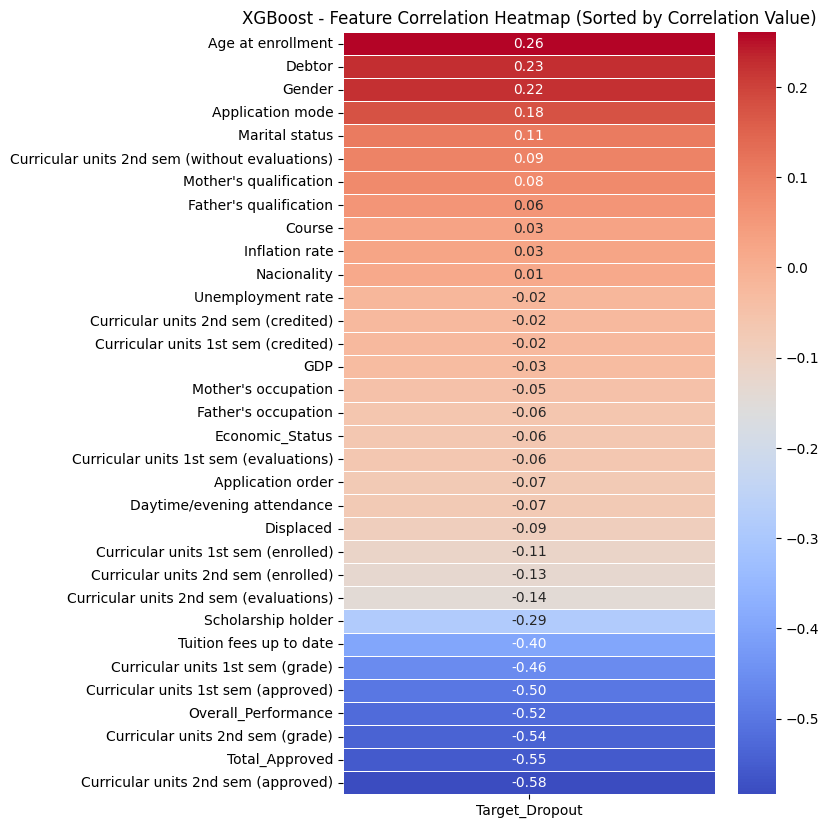

In [ ]:
# Call function for each model dataset
plot_feature_correlation(X_train_selected, y_train, "XGBoost")

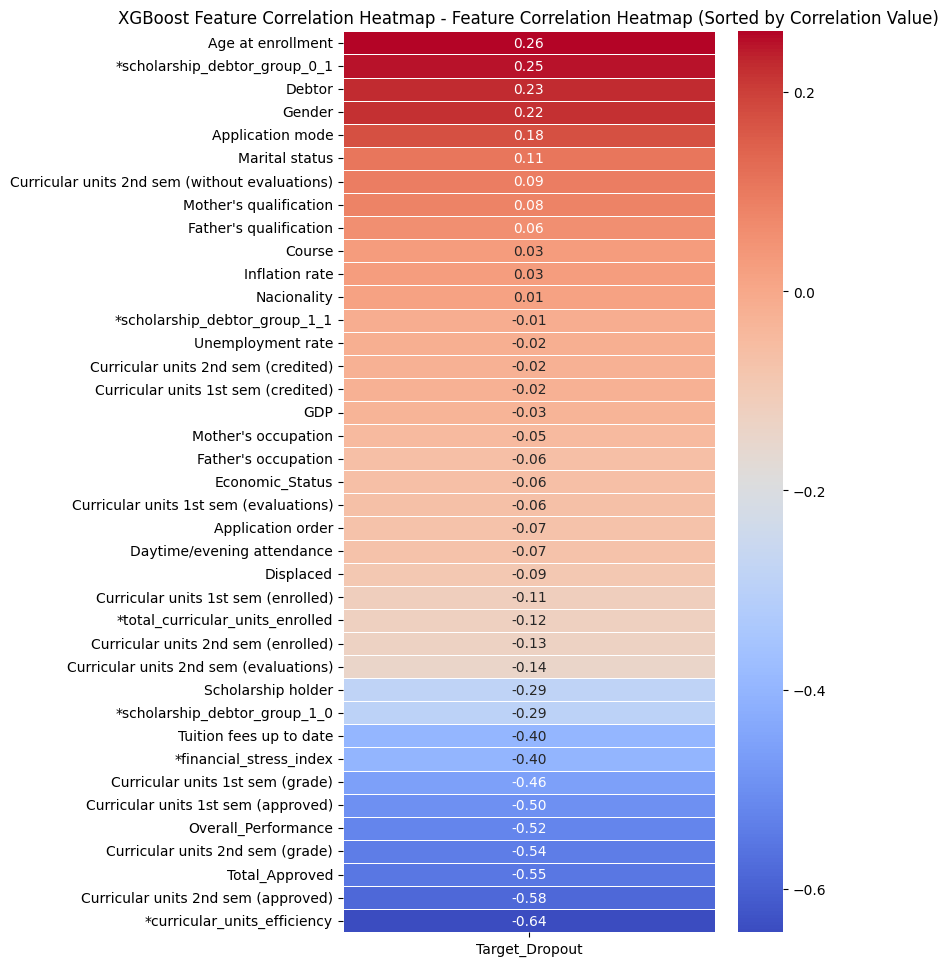

Feature engineering complete with all original and new features!


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: create new feature

X_train_fe = X_train_selected.copy()
X_test_fe = X_test_selected.copy()

# Financial Stress Index
X_train_fe['*financial_stress_index'] = X_train_fe['Tuition fees up to date'] / (1 + X_train_fe['Debtor'])
X_test_fe['*financial_stress_index'] = X_test_fe['Tuition fees up to date'] / (1 + X_test_fe['Debtor'])

# Total Curricular Units Enrolled
X_train_fe['*total_curricular_units_enrolled'] = (
    X_train_fe['Curricular units 1st sem (enrolled)'] +
    X_train_fe['Curricular units 2nd sem (enrolled)']
)
X_test_fe['*total_curricular_units_enrolled'] = (
    X_test_fe['Curricular units 1st sem (enrolled)'] +
    X_test_fe['Curricular units 2nd sem (enrolled)']
)

# Curricular Units Efficiency (Approved / Enrolled Ratio)
X_train_fe['*curricular_units_efficiency'] = (
    (X_train_fe['Curricular units 1st sem (approved)'] +
     X_train_fe['Curricular units 2nd sem (approved)']) /
    (X_train_fe['Curricular units 1st sem (enrolled)'] +
     X_train_fe['Curricular units 2nd sem (enrolled)'] + 1e-5)
)
X_test_fe['*curricular_units_efficiency'] = (
    (X_test_fe['Curricular units 1st sem (approved)'] +
     X_test_fe['Curricular units 2nd sem (approved)']) /
    (X_test_fe['Curricular units 1st sem (enrolled)'] +
     X_test_fe['Curricular units 2nd sem (enrolled)'] + 1e-5)
)

# Combine Scholarship Holder and Debtor (Categorical Combination)
X_train_fe['*scholarship_debtor_group'] = (
    X_train_fe['Scholarship holder'].astype(str) + "_" + X_train_fe['Debtor'].astype(str)
)
X_test_fe['*scholarship_debtor_group'] = (
    X_test_fe['Scholarship holder'].astype(str) + "_" + X_test_fe['Debtor'].astype(str)
)

# One-Hot Encoding
X_train_fe = pd.get_dummies(X_train_fe, columns=['*scholarship_debtor_group'], drop_first=True)
X_test_fe = pd.get_dummies(X_test_fe, columns=['*scholarship_debtor_group'], drop_first=True)

# Align
X_train_fe, X_test_fe = X_train_fe.align(X_test_fe, join='inner', axis=1)


# Plot correlation heatmap for XGBoost
plot_feature_correlation(X_train_fe, y_train, "XGBoost Feature Correlation Heatmap")

# Step 3:
print("Feature engineering complete with all original and new features!")


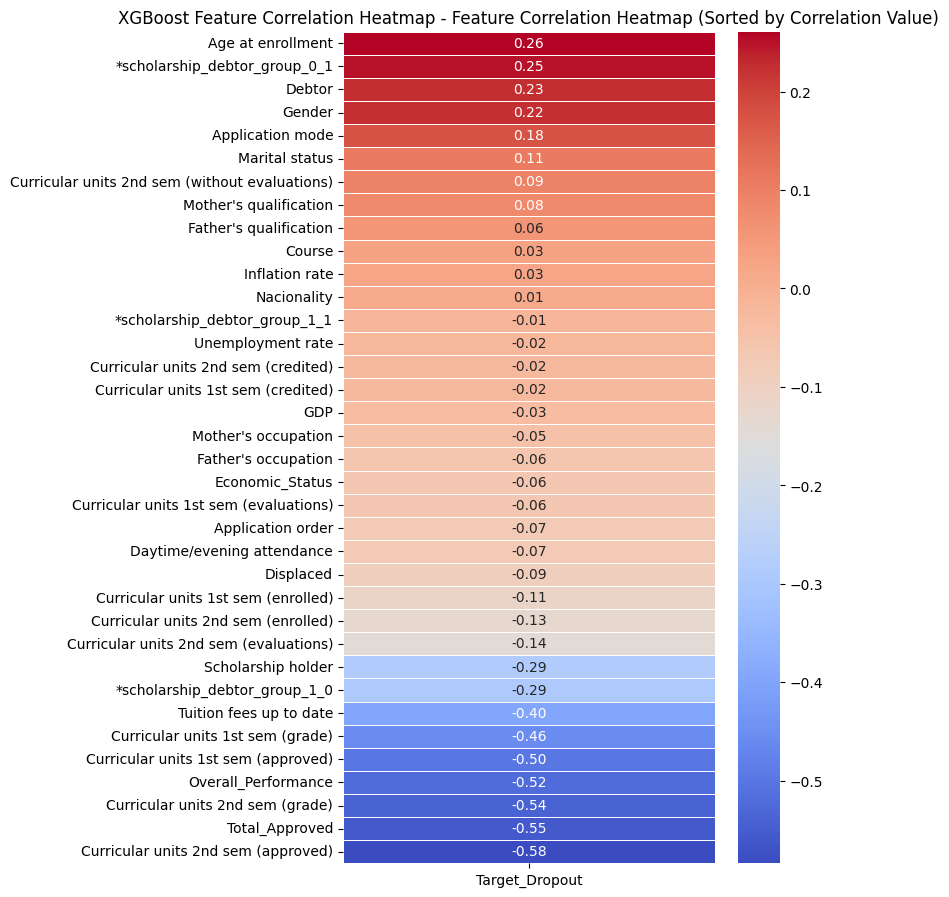

Feature engineering complete with all original and new features!


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: create new feature

X_train_final = X_train_selected.copy()
X_test_final = X_test_selected.copy()

# Combine Scholarship Holder and Debtor (Categorical Combination)
X_train_final['*scholarship_debtor_group'] = (
    X_train_final['Scholarship holder'].astype(str) + "_" + X_train_final['Debtor'].astype(str)
)
X_test_final['*scholarship_debtor_group'] = (
    X_test_final['Scholarship holder'].astype(str) + "_" + X_test_final['Debtor'].astype(str)
)

# One-Hot Encoding
X_train_final = pd.get_dummies(X_train_final, columns=['*scholarship_debtor_group'], drop_first=True)
X_test_final = pd.get_dummies(X_test_final, columns=['*scholarship_debtor_group'], drop_first=True)

# Align
X_train_final, X_test_final = X_train_final.align(X_test_final, join='inner', axis=1)


# Plot correlation heatmap for XGBoost
plot_feature_correlation(X_train_final, y_train, "XGBoost Feature Correlation Heatmap")

# Step 3:
print("Feature engineering complete with all original and new features!")


In [ ]:
print(f"X_train_final shape: {X_train_final.shape}")
print(f"y_train shape: {y_train.shape}")

X_train_final shape: (2300, 31)
y_train shape: (2300,)


Feature engineering complete!
X_train_final shape: (2300, 31)
X_test_final shape: (885, 31)
[0]	validation_0-logloss:0.64981	validation_1-logloss:0.64788
[65]	validation_0-logloss:0.30101	validation_1-logloss:0.33804
xgb Model Performance with New Features:
Accuracy: 0.8655
F1 Score: 0.7886
Precision: 0.7603
Recall: 0.8192


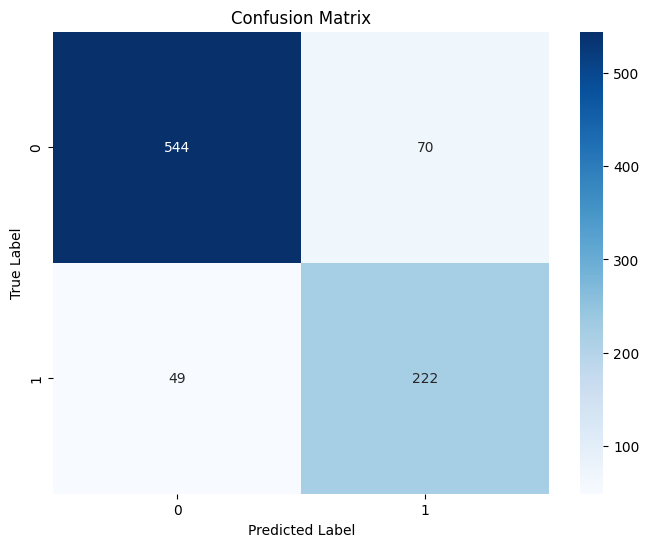


Confusion Matrix:
[[544  70]
 [ 49 222]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_scholarship_debtor_feature(df):
    """Create scholarship_debtor_group feature and remove original features"""
    df = df.copy()

    # Create combined feature
    df['*scholarship_debtor_group'] = (
        df['Scholarship holder'].astype(str) + "_" + df['Debtor'].astype(str)
    )

    # Remove original features
    df = df.drop(['Scholarship holder', 'Debtor'], axis=1)

    return df

def prepare_final_features(X_train, X_test):
    """Prepare final feature set with one-hot encoding"""
    # Create new features and remove original ones
    X_train_final = create_scholarship_debtor_feature(X_train)
    X_test_final = create_scholarship_debtor_feature(X_test)

    # One-hot encoding
    X_train_final = pd.get_dummies(X_train_final, columns=['*scholarship_debtor_group'], drop_first=True)
    X_test_final = pd.get_dummies(X_test_final, columns=['*scholarship_debtor_group'], drop_first=True)

    # Align columns
    X_train_final, X_test_final = X_train_final.align(X_test_final, join='inner', axis=1)

    return X_train_final, X_test_final

# Prepare final features
X_train_final, X_test_final = prepare_final_features(X_train_selected, X_test_selected)

print("Feature engineering complete!")
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")

# Initialize and train XGBoost model
xgb_model_final = XGBClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    early_stopping_rounds=10,
    eval_metric='logloss'
)

# Train with validation set
xgb_model_final.fit(
    X_train_final,
    y_train,
    eval_set=[(X_train_final, y_train), (X_test_final, y_test)],
    verbose=100
)

# Make predictions
y_pred_xgb = xgb_model_final.predict(X_test_final)


# Evaluate model performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
precision_rf = precision_score(y_test, y_pred_xgb)
recall_rf = recall_score(y_test, y_pred_xgb)

# Print evaluation metrics
print("xgb Model Performance with New Features:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")


cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nConfusion Matrix:")
print(cm)

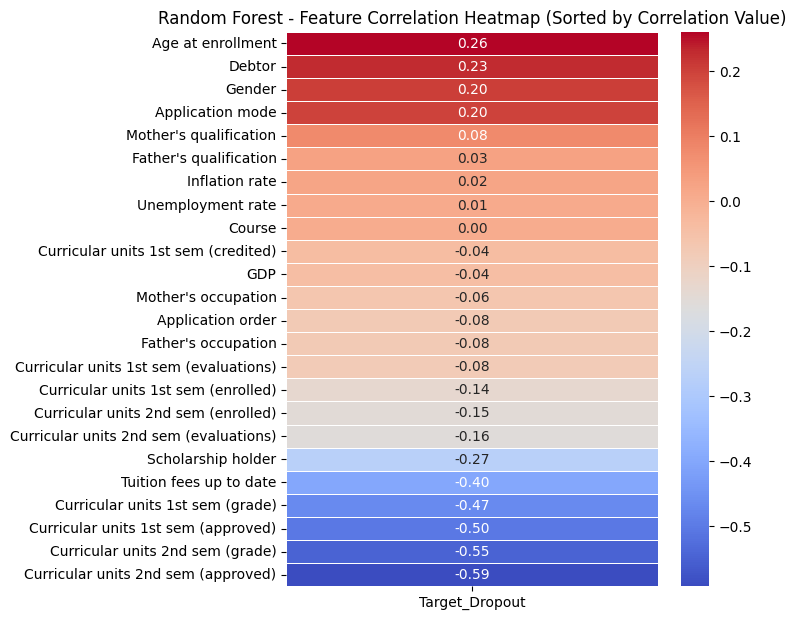

In [ ]:
plot_feature_correlation(X_train_rf, y_train, "Random Forest")

In [ ]:
# Step 1: Create new features
X_train_fe = X_train_rf.copy()
X_test_fe = X_test_rf.copy()

# 1. Economic Stress Index (Financial Stress)
X_train_fe['*economic_stress_index'] = (
    X_train_fe['Tuition fees up to date'] / (1 + X_train_fe['Debtor'])
)
X_test_fe['*economic_stress_index'] = (
    X_test_fe['Tuition fees up to date'] / (1 + X_test_fe['Debtor'])
)

# 2. Academic Efficiency (Approved / Enrolled)
X_train_fe['*academic_efficiency'] = (
    (X_train_fe['Curricular units 1st sem (approved)'] +
     X_train_fe['Curricular units 2nd sem (approved)']) /
    (X_train_fe['Curricular units 1st sem (enrolled)'] +
     X_train_fe['Curricular units 2nd sem (enrolled)'] + 1e-5)
)
X_test_fe['*academic_efficiency'] = (
    (X_test_fe['Curricular units 1st sem (approved)'] +
     X_test_fe['Curricular units 2nd sem (approved)']) /
    (X_test_fe['Curricular units 1st sem (enrolled)'] +
     X_test_fe['Curricular units 2nd sem (enrolled)'] + 1e-5)
)

# 3. Combine Scholarship Holder and Debtor (Categorical Combination)
X_train_fe['*scholarship_debtor_group'] = (
    X_train_fe['Scholarship holder'].astype(str) + "_" + X_train_fe['Debtor'].astype(str)
)
X_test_fe['*scholarship_debtor_group'] = (
    X_test_fe['Scholarship holder'].astype(str) + "_" + X_test_fe['Debtor'].astype(str)
)

# 4. One-Hot Encoding for scholarship_debtor_group
X_train_fe = pd.get_dummies(X_train_fe, columns=['*scholarship_debtor_group'], drop_first=True)
X_test_fe = pd.get_dummies(X_test_fe, columns=['*scholarship_debtor_group'], drop_first=True)

# Step 2: Align columns between training and testing sets
X_train_fe, X_test_fe = X_train_fe.align(X_test_fe, join='inner', axis=1)

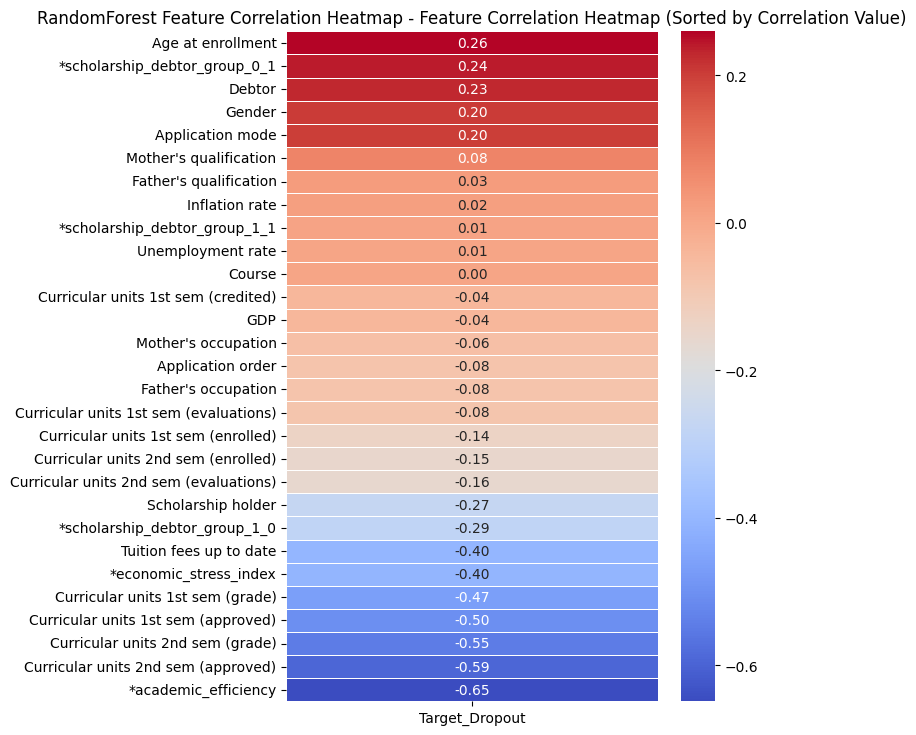

In [ ]:
# Plot correlation heatmap for RandomForest
plot_feature_correlation(X_train_fe, y_train, "RandomForest Feature Correlation Heatmap")

Random Forest Model Performance with New Features:
Accuracy: 0.8644
F1 Score: 0.7880
Precision: 0.7559
Recall: 0.8229


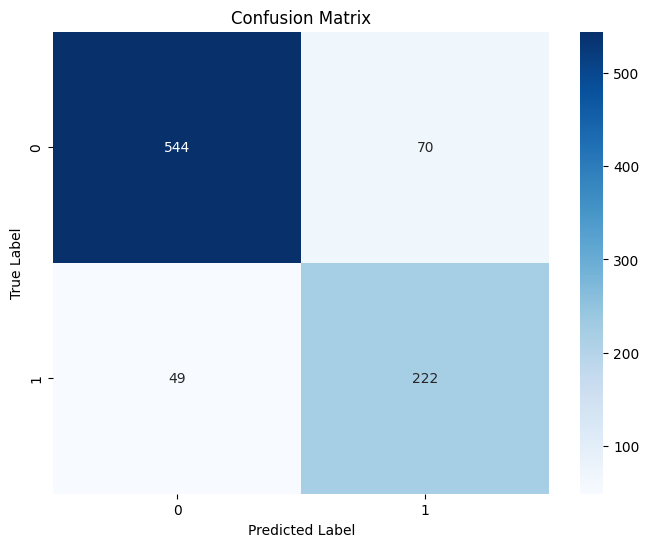


Confusion Matrix:
[[544  70]
 [ 49 222]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train_fe, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_fe)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest Model Performance with New Features:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")

cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nConfusion Matrix:")
print(cm)


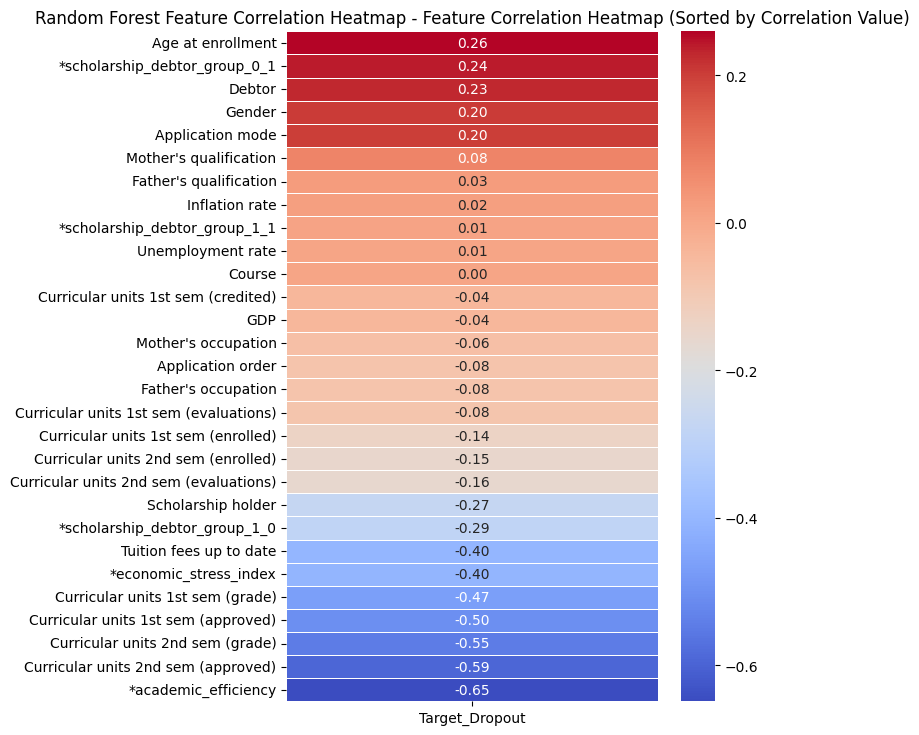

In [ ]:
plot_feature_correlation(X_train_fe, y_train, "Random Forest Feature Correlation Heatmap")

In [ ]:
# Delete the original one, our performace become lower

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Step 1: Drop original features (Scholarship holder and Debtor)
X_train_reduced = X_train_fe.drop(columns=['Scholarship holder', 'Debtor'], errors='ignore')
X_test_reduced = X_test_fe.drop(columns=['Scholarship holder', 'Debtor'], errors='ignore')

# Step 2: Train a Random Forest model on the reduced feature set
rf_model_reduced = RandomForestClassifier(
    n_estimators=100, max_depth=10, random_state=42
)
rf_model_reduced.fit(X_train_reduced, y_train)

# Step 3: Make predictions on the test set
y_pred_reduced = rf_model_reduced.predict(X_test_reduced)

# Step 4: Evaluate model performance
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
f1_reduced = f1_score(y_test, y_pred_reduced)
precision_reduced = precision_score(y_test, y_pred_reduced)
recall_reduced = recall_score(y_test, y_pred_reduced)

# Step 5: Print evaluation metrics
print("Random Forest Model Performance with Reduced Features (No Scholarship holder, Debtor):")
print(f"Accuracy: {accuracy_reduced:.4f}")
print(f"F1 Score: {f1_reduced:.4f}")
print(f"Precision: {precision_reduced:.4f}")
print(f"Recall: {recall_reduced:.4f}")

# Step 6: Optional - Compare with the original model
# Train the original model (with all features)
rf_model_original = RandomForestClassifier(
    n_estimators=100, max_depth=10, random_state=42
)
rf_model_original.fit(X_train_fe, y_train)

# Predict on the test set
y_pred_original = rf_model_original.predict(X_test_fe)

# Evaluate original model performance
accuracy_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)
precision_original = precision_score(y_test, y_pred_original)
recall_original = recall_score(y_test, y_pred_original)

# Print original model metrics for comparison
print("\nRandom Forest Model Performance with All Features:")
print(f"Accuracy: {accuracy_original:.4f}")
print(f"F1 Score: {f1_original:.4f}")
print(f"Precision: {precision_original:.4f}")
print(f"Recall: {recall_original:.4f}")

# Step 7: Compare results
print("\nComparison of Results:")
print(f"Accuracy Change: {accuracy_reduced - accuracy_original:.4f}")
print(f"F1 Score Change: {f1_reduced - f1_original:.4f}")
print(f"Precision Change: {precision_reduced - precision_original:.4f}")
print(f"Recall Change: {recall_reduced - recall_original:.4f}")


Random Forest Model Performance with Reduced Features (No Scholarship holder, Debtor):
Accuracy: 0.8712
F1 Score: 0.7979
Precision: 0.7679
Recall: 0.8303

Random Forest Model Performance with All Features:
Accuracy: 0.8644
F1 Score: 0.7880
Precision: 0.7559
Recall: 0.8229

Comparison of Results:
Accuracy Change: 0.0068
F1 Score Change: 0.0099
Precision Change: 0.0120
Recall Change: 0.0074


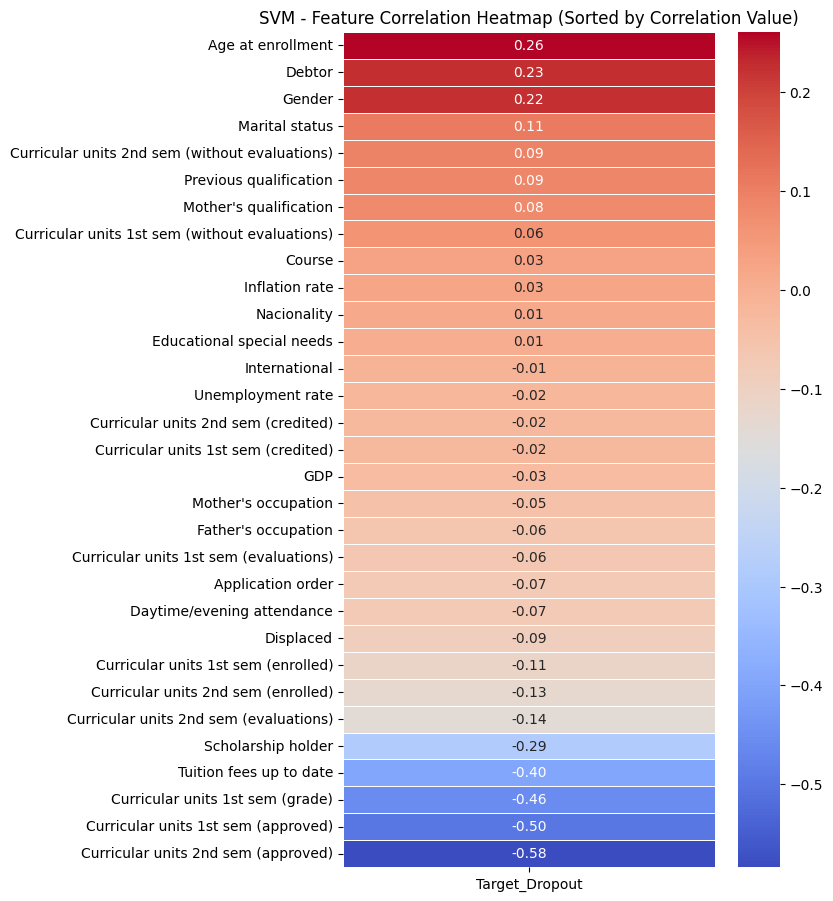

In [ ]:
plot_feature_correlation(X_train_svm, y_train, "SVM")

In [ ]:
import pandas as pd
import numpy as np

# Step 1: create new feature
X_train_svm_fe = X_train_svm.copy()
X_test_svm_fe = X_test_svm.copy()

# 1. Financial Stress Index (Tuition fees / Debtor)
X_train_svm_fe['*financial_stress_index'] = (
    X_train_svm_fe['Tuition fees up to date'] / (1 + X_train_svm_fe['Debtor'])
)
X_test_svm_fe['*financial_stress_index'] = (
    X_test_svm_fe['Tuition fees up to date'] / (1 + X_test_svm_fe['Debtor'])
)

# 2. Academic Efficiency (Approved / Enrolled)
X_train_svm_fe['*academic_efficiency'] = (
    (X_train_svm_fe['Curricular units 1st sem (approved)'] +
     X_train_svm_fe['Curricular units 2nd sem (approved)']) /
    (X_train_svm_fe['Curricular units 1st sem (enrolled)'] +
     X_train_svm_fe['Curricular units 2nd sem (enrolled)'] + 1e-5)
)
X_test_fe['*academic_efficiency'] = (
    (X_test_svm_fe['Curricular units 1st sem (approved)'] +
     X_test_svm_fe['Curricular units 2nd sem (approved)']) /
    (X_test_svm_fe['Curricular units 1st sem (enrolled)'] +
     X_test_svm_fe['Curricular units 2nd sem (enrolled)'] + 1e-5)
)

# 3. Gender and Debtor Interaction (Categorical)
X_train_svm_fe['*gender_debtor_interaction'] = (
    X_train_svm_fe['Gender'].astype(str) + "_" + X_train_svm_fe['Debtor'].astype(str)
)
X_test_svm_fe['*gender_debtor_interaction'] = (
    X_test_svm_fe['Gender'].astype(str) + "_" + X_test_svm_fe['Debtor'].astype(str)
)

# 4. One-Hot Encoding for gender_debtor_interaction
X_train_svm_fe = pd.get_dummies(X_train_svm_fe, columns=['*gender_debtor_interaction'], drop_first=True)
X_test_svm_fe = pd.get_dummies(X_test_svm_fe, columns=['*gender_debtor_interaction'], drop_first=True)

# Step 2: Align Columns
X_train_svm_fe, X_test_svm_fe = X_train_svm_fe.align(X_test_svm_fe, join='inner', axis=1)

print("Feature engineering complete!")


Feature engineering complete!


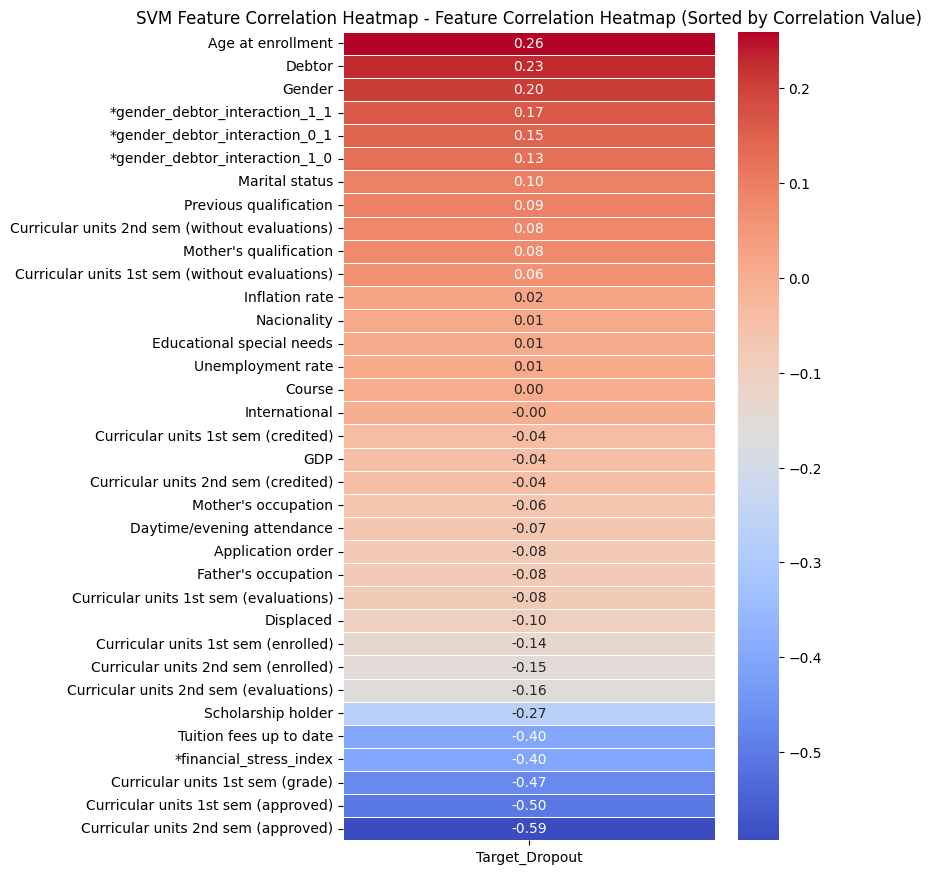

In [ ]:
plot_feature_correlation(X_train_svm_fe, y_train, "SVM Feature Correlation Heatmap")

SVM Model Performance with New Features:
Accuracy: 0.8746
F1 Score: 0.7993
Precision: 0.7837
Recall: 0.8155


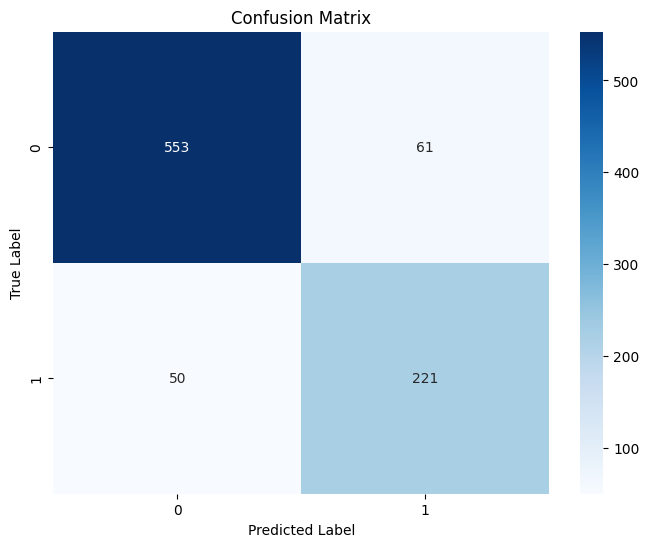


Confusion Matrix:
[[553  61]
 [ 50 221]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Initialize SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train_svm_fe, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_svm_fe)

# Evaluate model performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

# Print evaluation metrics
print("SVM Model Performance with New Features:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nConfusion Matrix:")
print(cm)


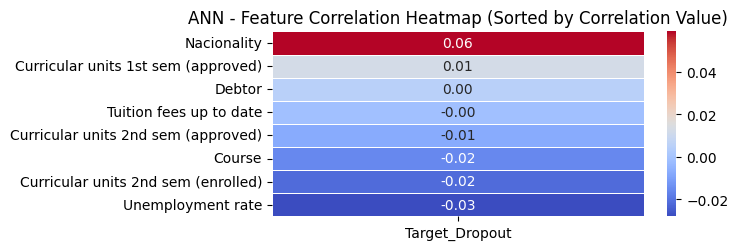

In [ ]:
plot_feature_correlation(X_train_ann_df, y_train, "ANN")

In [ ]:
print("X_train_ann_df shape:", X_train_ann_df.shape)
print("y_train shape:", y_train.shape)

X_train_ann_df shape: (2300, 8)
y_train shape: (2300,)
